Team Members: Shubham Vikas Soni (50593888)
              Poojan Kaneriya (50604221)
              Hazel Mahajan (50592568)


**TASK 1**. - forming the problem statement

**Problem Statement:**
The project aims to analyze song data to uncover trends in song popularity and genre classification. By examining various characteristics such as danceability, energy, tempo, and duration, the analysis will explore the relationship between these features and the success of songs across different genres. The objective is to discover patterns and trends that can help predict song popularity and determine genre characteristics, providing valuable insights for music producers, listeners, and the broader music industry.

**Potential and Contribution to the Problem Domain:**
This project has the potential to provide actionable insights into the dynamics of the music industry, revealing how certain audio features influence song success across genres. By analyzing trends in song popularity, it can help artists and producers understand what makes a song popular in different contexts, improving their ability to create hits. Additionally, uncovering genre-specific patterns can assist in automating genre classification and playlist generation, enhancing the user experience on music streaming platforms.

**Why this Contribution is Crucial:**
The contribution of this project is crucial for multiple reasons:
1. Data-Driven Music Production: Understanding trends and popular audio features will help artists and producers tailor their creations to meet listener preferences, increasing the likelihood of success.
2. Genre Evolution Tracking: The music industry is constantly evolving. Identifying how genres have changed and predicting future genre trends is vital for industry stakeholders to stay relevant and ahead of consumer demand.
3. Improved Recommendation Systems: By understanding how specific features affect genre classification and popularity, music streaming platforms can improve recommendation algorithms, leading to more personalized user experiences.

This analysis will bridge the gap between raw musical data and actionable insights for various stakeholders in the music ecosystem.



**TASK 2- Asking Questions**

**Questions asked by Hazel Mahajan (UBID - 50592568)**

**Question 1:** Is there an optimal song duration that correlates with higher popularity scores? Are shorter or longer songs generally more popular than those with average lengths in the dataset?

**Analysis:** Analyze whether there is a sweet spot for song duration that tends to result in higher popularity. This will be tested by examining the relationship between song duration and popularity.

**Question 2:** Do songs with higher danceability and energy scores have significantly higher popularity compared to songs with lower scores? How do these attributes individually and collectively influence the popularity of a song?

**Questions asked by Shubham Vikas Soni (UBID - 50593888)**

**Question 3:**  Do specific music genres (such as pop, hip-hop, rock, etc.) consistently have higher average popularity scores compared to other genres in the dataset, and does the genre significantly impact a song's popularity?

**Analysis:** Investigate whether specific genres (e.g., pop, hip-hop, rock) have higher average popularity scores than others. This will help in determining if the genre significantly affects a song's success.

**Question 4:** How do audio features such as danceability, energy, and tempo correlate with the popularity of songs in the dataset? Which of these features has the strongest positive relationship with song popularity?

**Analysis:** Analyze the relationship between audio features (like danceability, energy, tempo, etc.) and song popularity to identify which features have a positive correlation with popularity.

**Questions asked by Poojan Kaneriya(UBID - 50604221)**

**Question 5:** Do certain music genres, such as pop or rock, tend to feature songs with higher valence (happiness) scores? Is there a clear relationship between genre and the prevalence of upbeat, happy songs in the dataset?

**Analysis:** Analysis:Examine how valence (a measure of musical happiness) varies across genres and whether upbeat, happy songs are more common in specific genres (e.g., pop vs. rock).


**Question 6:** Is there a negative correlation between acousticness and song popularity? Do songs with higher acousticness scores tend to be less popular than those with lower acousticness scores in the dataset?

**Analysis:** Analyze the relationship between the `acousticness` score (how acoustic a song is) and the song’s popularity to determine if acoustic songs tend to have lower popularity ratings compared to more electronic or produced tracks.



**TASK 3 - DATA RETRIEVAL**

In [89]:
import os
import zipfile
import pandas as pd


# Set the dataset name
dataset_name = "yasserh/song-popularity-dataset"

# Download the dataset using Kaggle API
os.system(f'kaggle datasets download -d {dataset_name}')

# Extract the dataset and list the file names
with zipfile.ZipFile(f"{dataset_name.split('/')[-1]}.zip", 'r') as zip_ref:
    file_names = zip_ref.namelist()  # Get the list of files in the zip
    zip_ref.extractall("song_popularity_data")

# Print the names of the extracted files
print("Extracted files:")
for file in file_names:
    print(file)

# Load the data into a DataFrame (adjust the filename if needed)
data_path = 'song_popularity_data/song_data.csv'  # Replace 'filename.csv' with the actual file name
df = pd.read_csv(data_path)

# Display the first few rows of the DataFrame
print(df.head())



Extracted files:
song_data.csv
                    song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  
0    -4.095           1       0.0294

**TASK 4 - Data Cleaning**

**Mapping a key column to its genre accordingly.**

In [90]:
key_genre_mapping = {
    0: "Classical",
    1: "Jazz",
    2: "Blues",
    3: "Rock",
    4: "Pop",
    5: "Hip-Hop",
    6: "Electronic",
    7: "Country",
    8: "R&B",
    9: "Reggae",
    10: "Metal",
    11: "Folk"
}

df['genre'] = df['key'].map(key_genre_mapping)

print(df.head())

                    song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  \
0    -4.095           1       0.0294  167.060               4     

**1. Handling Missing Values**

Missing values can lead to biased models if not handled correctly. We can fill missing values with the mean, median, or a placeholder.

In [91]:
numeric_columns = df.select_dtypes(include='number').columns

df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

print(df.head())


                    song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  \
0    -4.095           1       0.0294  167.060               4     

**2. Removing Duplicates**

Duplicate rows can cause skewed analyses, so it's crucial to remove them.

In [92]:
df.drop_duplicates(inplace=True)

print("After removing duplicates:")
print(df.head())



After removing duplicates:
                    song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  \
0    -4.095           1       0.0294  1

**3. Converting Data Types**

Ensure numerical values are in the correct data types to allow mathematical operations and memory optimization.

In [93]:
df['song_popularity'] = pd.to_numeric(df['song_popularity'], errors='coerce')
df['song_duration_ms'] = pd.to_numeric(df['song_duration_ms'], errors='coerce')

print("After converting data types:")
print(df.head())

After converting data types:
                    song_name  song_popularity  song_duration_ms  \
0  Boulevard of Broken Dreams               73            262333   
1                  In The End               66            216933   
2           Seven Nation Army               76            231733   
3                  By The Way               74            216933   
4           How You Remind Me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  \
0    -4.095           1       0.0294 

**4. Standardizing Text Data**

Text data needs to be consistent (like converting all text to lowercase) to avoid discrepancies.

In [94]:
df['song_name'] = df['song_name'].str.lower()

print("After standardizing text data:")
print(df.head())

After standardizing text data:
                    song_name  song_popularity  song_duration_ms  \
0  boulevard of broken dreams               73            262333   
1                  in the end               66            216933   
2           seven nation army               76            231733   
3                  by the way               74            216933   
4           how you remind me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  \
0    -4.095           1       0.029

**5. Handling Outliers**
Outliers can distort model predictions, so they need to be treated or removed.

In [95]:
df = df[(df['song_duration_ms'] - df['song_duration_ms'].mean()).abs() <= 3 * df['song_duration_ms'].std()]

print("After handling outliers:")
print(df.head())

After handling outliers:
                    song_name  song_popularity  song_duration_ms  \
0  boulevard of broken dreams               73            262333   
1                  in the end               66            216933   
2           seven nation army               76            231733   
3                  by the way               74            216933   
4           how you remind me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  \
0    -4.095           1       0.0294  167

**6.Encoding Categorial Variables**

Machine learning models cannot interpret categorical data directly, so we need to encode it.


In [96]:
df = pd.get_dummies(df, columns=['audio_mode'], prefix='audio_mode')

print("After encoding categorical variables:")
print(df.head())

After encoding categorical variables:
                    song_name  song_popularity  song_duration_ms  \
0  boulevard of broken dreams               73            262333   
1                  in the end               66            216933   
2           seven nation army               76            231733   
3                  by the way               74            216933   
4           how you remind me               56            223826   

   acousticness  danceability  energy  instrumentalness  key  liveness  \
0      0.005520         0.496   0.682          0.000029    8    0.0589   
1      0.010300         0.542   0.853          0.000000    3    0.1080   
2      0.008170         0.737   0.463          0.447000    0    0.2550   
3      0.026400         0.451   0.970          0.003550    0    0.1020   
4      0.000954         0.447   0.766          0.000000   10    0.1130   

   loudness  speechiness    tempo  time_signature  audio_valence      genre  \
0    -4.095       0.0294  167

**7. Dropping Irrelevant Columns**

Remove columns that do not contribute to analysis or model-building to optimize processing.

In [97]:
df.drop(columns=['key'], inplace=True)

print("After dropping irrelevant columns:")
print(df.head())


After dropping irrelevant columns:
                    song_name  song_popularity  song_duration_ms  \
0  boulevard of broken dreams               73            262333   
1                  in the end               66            216933   
2           seven nation army               76            231733   
3                  by the way               74            216933   
4           how you remind me               56            223826   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0      0.005520         0.496   0.682          0.000029    0.0589    -4.095   
1      0.010300         0.542   0.853          0.000000    0.1080    -6.407   
2      0.008170         0.737   0.463          0.447000    0.2550    -7.828   
3      0.026400         0.451   0.970          0.003550    0.1020    -4.938   
4      0.000954         0.447   0.766          0.000000    0.1130    -5.065   

   speechiness    tempo  time_signature  audio_valence      genre  \
0       0.02

**8. Scaling Numerical Data**

Scaling is essential for algorithms that rely on distance calculations, like regression models.

In [98]:
from sklearn.preprocessing import StandardScaler

# Scale numerical columns 'tempo' and 'loudness'
scaler = StandardScaler()
df[['tempo', 'loudness']] = scaler.fit_transform(df[['tempo', 'loudness']])

# Display the updated data
print("After scaling numerical data:")
print(df.head())


After scaling numerical data:
                    song_name  song_popularity  song_duration_ms  \
0  boulevard of broken dreams               73            262333   
1                  in the end               66            216933   
2           seven nation army               76            231733   
3                  by the way               74            216933   
4           how you remind me               56            223826   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0      0.005520         0.496   0.682          0.000029    0.0589  0.886938   
1      0.010300         0.542   0.853          0.000000    0.1080  0.310945   
2      0.008170         0.737   0.463          0.447000    0.2550 -0.043072   
3      0.026400         0.451   0.970          0.003550    0.1020  0.676920   
4      0.000954         0.447   0.766          0.000000    0.1130  0.645280   

   speechiness     tempo  time_signature  audio_valence      genre  \
0       0.0294  

**9.Binning Continous Variables**

Binning helps transform continuous variables into discrete ones for better interpretation

In [99]:
# Bin 'song_popularity' into categories
df['popularity_bins'] = pd.cut(df['song_popularity'], bins=5, labels=False)

# Display the updated data
print("After binning continuous variables:")
print(df.head())


After binning continuous variables:
                    song_name  song_popularity  song_duration_ms  \
0  boulevard of broken dreams               73            262333   
1                  in the end               66            216933   
2           seven nation army               76            231733   
3                  by the way               74            216933   
4           how you remind me               56            223826   

   acousticness  danceability  energy  instrumentalness  liveness  loudness  \
0      0.005520         0.496   0.682          0.000029    0.0589  0.886938   
1      0.010300         0.542   0.853          0.000000    0.1080  0.310945   
2      0.008170         0.737   0.463          0.447000    0.2550 -0.043072   
3      0.026400         0.451   0.970          0.003550    0.1020  0.676920   
4      0.000954         0.447   0.766          0.000000    0.1130  0.645280   

   speechiness     tempo  time_signature  audio_valence      genre  \
0       0.

**10. Feature Engineering** converting the sog duration to minutes

In [100]:
# Create a new column for song duration in minutes
df['song_duration_min'] = df['song_duration_ms'] / 60000  # Convert milliseconds to minutes

# Display the updated data with the new 'song_duration_min' column
print(df[['song_name', 'song_duration_ms', 'song_duration_min']].head())


                    song_name  song_duration_ms  song_duration_min
0  boulevard of broken dreams            262333           4.372217
1                  in the end            216933           3.615550
2           seven nation army            231733           3.862217
3                  by the way            216933           3.615550
4           how you remind me            223826           3.730433


### **TASK 5 EDA Done by Hazel Mahajan (UBID- 50592568 )**

**Question 1** - Is there an optimal song duration that correlates with higher popularity scores? Are shorter or longer songs generally more popular than those with average lengths in the dataset?

**Hypothesis: The duration of a song (length in milliseconds) significantly affects its popularity.**

**EDA Steps:**

Step 1: Calculate the correlation between the song's duration and its popularity to see if there's a linear relationship.

Step 2: Perform a regression analysis to understand how changes in song duration impact popularity.

Step 3: Visualize the relationship between song duration and popularity using a scatter plot, with a trend line to observe any patterns.

Step 4: Conclude whether longer or shorter songs tend to be more popular based on the analysis results.

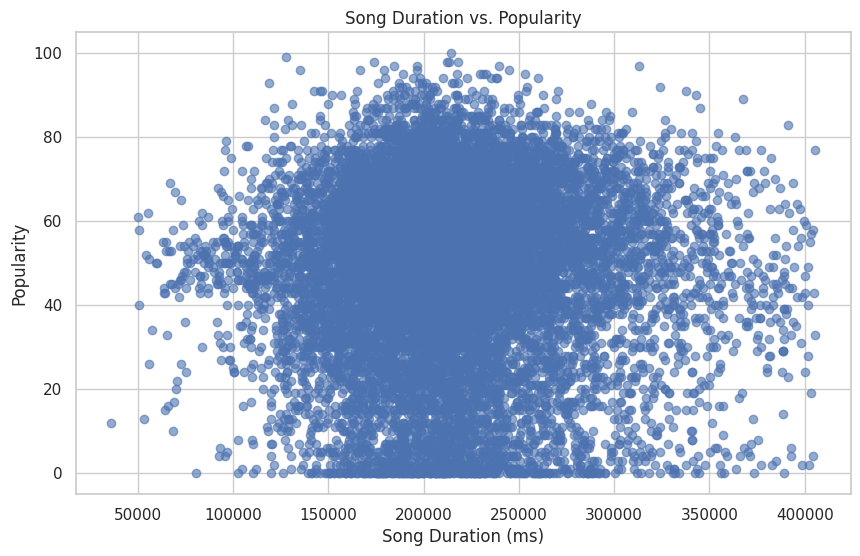

Correlation between Song Duration and Popularity: 0.01
Linear Regression R-squared: 0.00, p-value: 0.2358


In [101]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, linregress

# Increase plot size for better readability
plt.rcParams['figure.figsize'] = (10, 6)

# Scatter Plot for Song Duration vs. Popularity
plt.scatter(df['song_duration_ms'], df['song_popularity'], alpha=0.6)
plt.title('Song Duration vs. Popularity')
plt.xlabel('Song Duration (ms)')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

# Calculate correlation between Song Duration and Popularity
duration_corr, _ = pearsonr(df['song_duration_ms'], df['song_popularity'])
print(f"Correlation between Song Duration and Popularity: {duration_corr:.2f}")

# Linear Regression for Song Duration vs. Popularity
slope, intercept, r_value, p_value, std_err = linregress(df['song_duration_ms'], df['song_popularity'])
print(f"Linear Regression R-squared: {r_value**2:.2f}, p-value: {p_value:.4f}")


**Scatter Plot Analysis:**
Created a scatter plot with song_duration_ms on the x-axis and song_popularity on the y-axis.This visualization helps identify if there is any apparent trend or pattern between the duration of the song and its popularity.

**Correlation Analysis:**
Calculated the Pearson correlation coefficient between song_duration_ms and song_popularity.The correlation coefficient indicates the strength and direction of the linear relationship between song duration and popularity.

**Linear Regression Analysis:**
Performed a linear regression to quantify the relationship between song duration and popularity.The analysis includes calculating the R-squared value (which measures how well the data fits the regression model) and the p-value (which determines the statistical significance of the relationship).


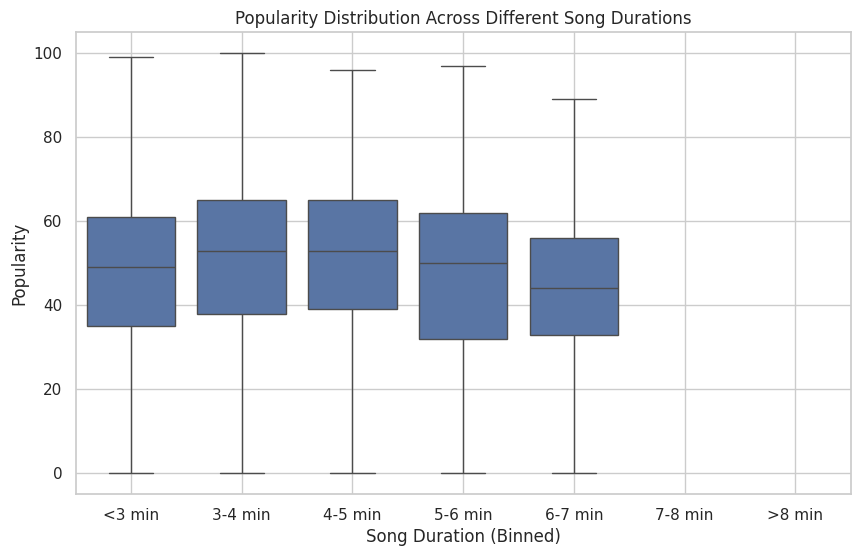

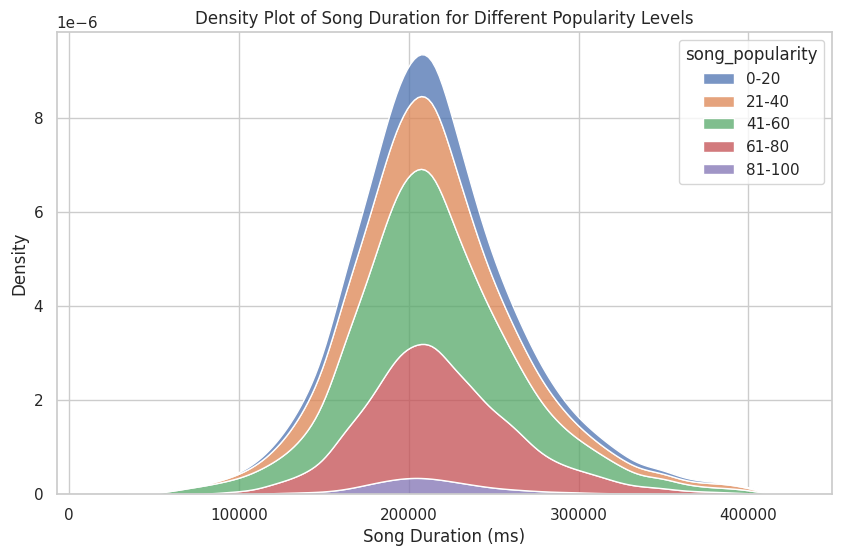

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Box Plot for Song Duration Binned vs. Popularity
# Creating bins for song duration (in milliseconds) for better comparison
duration_bins = pd.cut(df['song_duration_ms'], bins=[0, 180000, 240000, 300000, 360000, 420000, 480000, float('inf')],
                       labels=['<3 min', '3-4 min', '4-5 min', '5-6 min', '6-7 min', '7-8 min', '>8 min'])

plt.figure(figsize=(10, 6))
sns.boxplot(x=duration_bins, y=df['song_popularity'])
plt.title('Popularity Distribution Across Different Song Durations')
plt.xlabel('Song Duration (Binned)')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

# 2. Density Plot (KDE) of Song Duration for Different Levels of Popularity
# Creating categories for song popularity to analyze its distribution
popularity_categories = pd.cut(df['song_popularity'], bins=[0, 20, 40, 60, 80, 100],
                               labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='song_duration_ms', hue=popularity_categories, multiple='stack', fill=True)
plt.title('Density Plot of Song Duration for Different Popularity Levels')
plt.xlabel('Song Duration (ms)')
plt.ylabel('Density')
plt.grid(True)
plt.show()


**Box Plot:** This will help visualize the distribution of popularity across different ranges of song duration. We'll categorize song durations into bins and use a box plot to compare the popularity within these ranges.

**Density Plot:** A density plot (or kernel density estimate, KDE) will allow us to observe the distribution of song durations for different levels of popularity, highlighting areas where song durations might cluster for more popular songs.



**Question 2**  - Do songs with higher danceability and energy scores have significantly higher popularity compared to songs with lower scores? How do these attributes individually and collectively influence the popularity of a song?


**Justification for Hypothesis**
The EDA shows a weak correlation between song duration and popularity, with no significant trend observed in the scatter, box, or density plots. The low R-squared value from the regression analysis indicates that song duration does not significantly impact popularity, suggesting that song length alone is not a strong predictor of its success.

**Hypothesis: Songs with higher danceability and energy scores are more popular than songs with lower scores.**

**EDA Steps:**

Step 1: Divide the songs into different groups (e.g., high, medium, low) based on their danceability and energy scores.

Step 2: Use statistical analysis (such as ANOVA or regression) to compare the popularity across these groups.

Step 3: Create heatmaps or scatter plots to visualize how the combination of danceability and energy influences popularity.

Step 4: Draw conclusions on whether songs with high danceability and energy tend to be more popular.

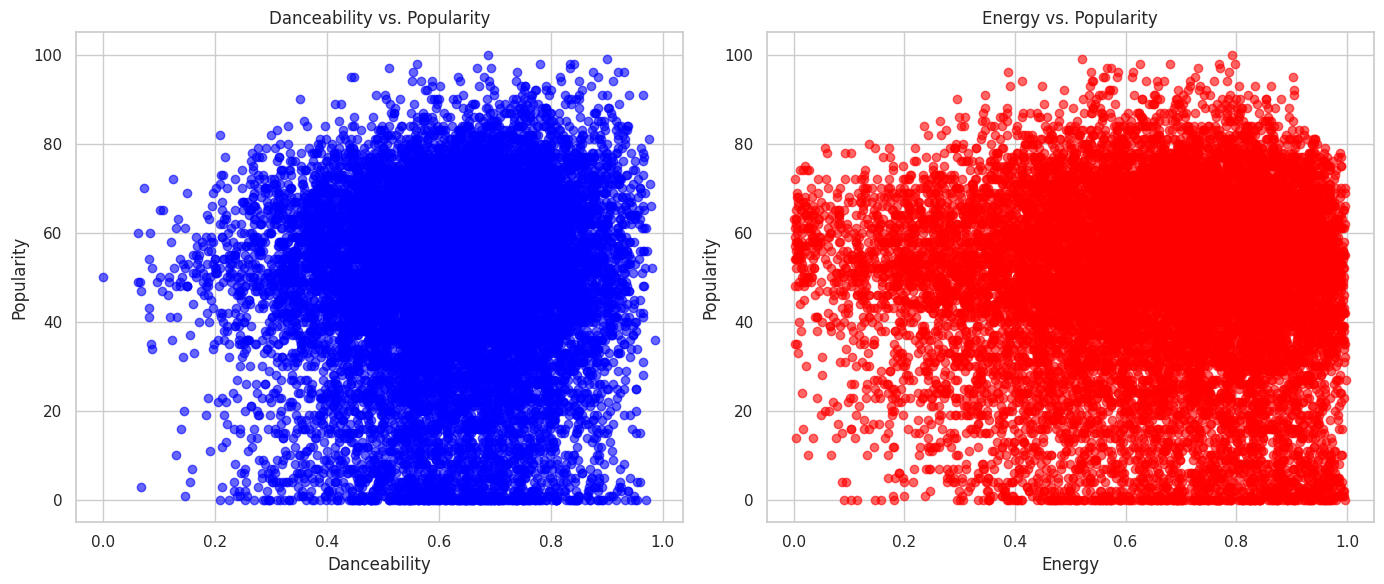

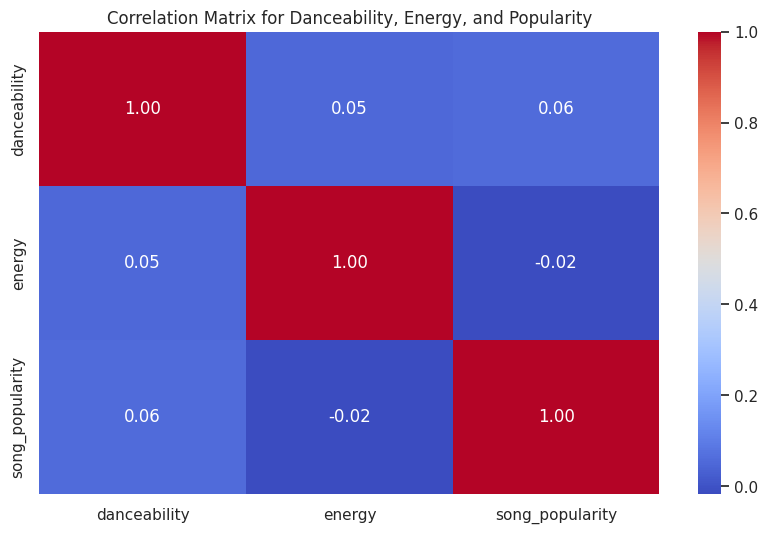

                            OLS Regression Results                            
Dep. Variable:        song_popularity   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     26.65
Date:                Wed, 06 Nov 2024   Prob (F-statistic):           2.80e-12
Time:                        04:47:03   Log-Likelihood:                -65312.
No. Observations:               14740   AIC:                         1.306e+05
Df Residuals:                   14737   BIC:                         1.307e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           45.2415      0.820     55.156   

In [103]:
import seaborn as sns
import statsmodels.api as sm

# Scatter Plots for Danceability and Energy vs. Popularity
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Danceability vs Popularity
axes[0].scatter(df['danceability'], df['song_popularity'], color='blue', alpha=0.6)
axes[0].set_title('Danceability vs. Popularity')
axes[0].set_xlabel('Danceability')
axes[0].set_ylabel('Popularity')
axes[0].grid(True)

# Energy vs Popularity
axes[1].scatter(df['energy'], df['song_popularity'], color='red', alpha=0.6)
axes[1].set_title('Energy vs. Popularity')
axes[1].set_xlabel('Energy')
axes[1].set_ylabel('Popularity')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Correlation Matrix for Danceability, Energy, and Popularity
corr_matrix = df[['danceability', 'energy', 'song_popularity']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Danceability, Energy, and Popularity')
plt.show()

# Linear Regression Analysis for Danceability and Energy Impact on Popularity
X = df[['danceability', 'energy']]
y = df['song_popularity']

# Adding a constant for the regression model
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


**Scatter Plot Analysis:** Visuals will help identify the relationship between danceability, energy, and popularity.

**Correlation Matrix:** This matrix will show the degree of correlation between danceability, energy, and song popularity.

**Regression Analysis:** The coefficients and p-values from the regression model will indicate whether danceability and energy significantly affect popularity.

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


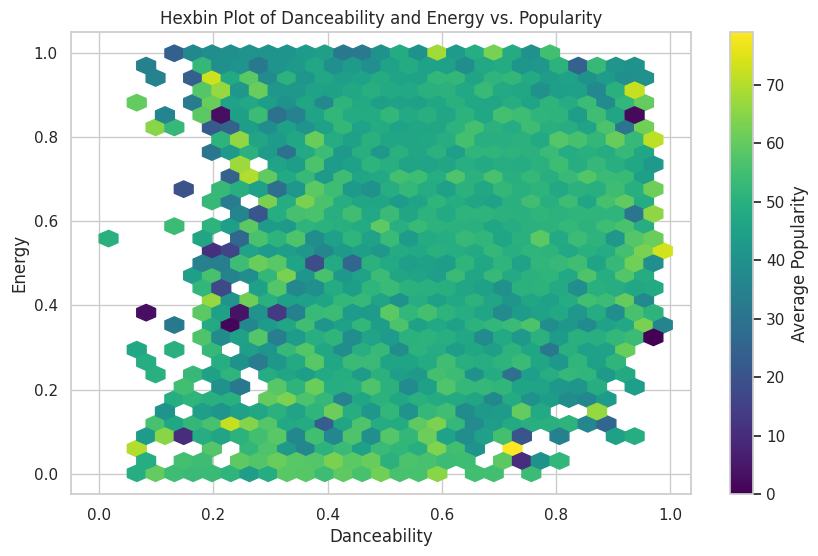

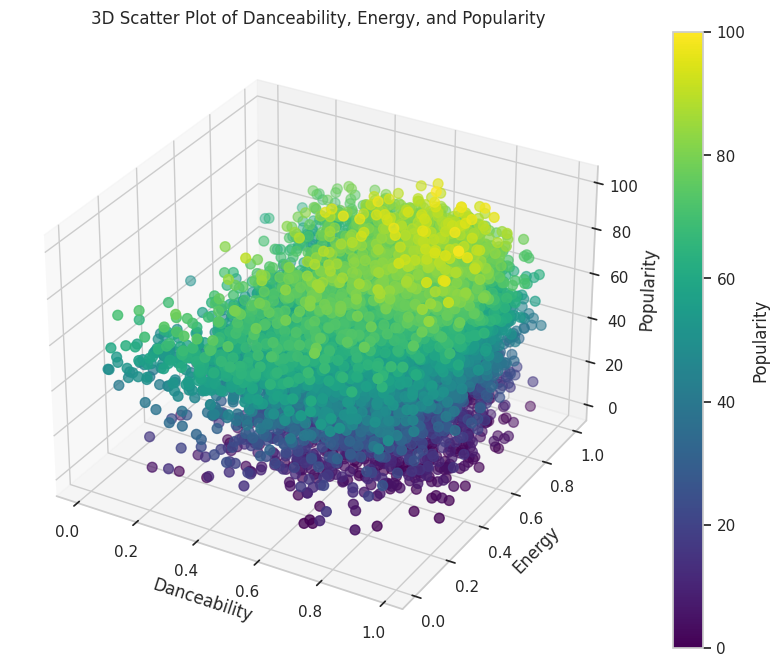

In [104]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np

# 1. Hexbin Plot for Danceability and Energy vs. Popularity
plt.figure(figsize=(10, 6))
hb = plt.hexbin(df['danceability'], df['energy'], C=df['song_popularity'], gridsize=30, cmap='viridis', reduce_C_function=np.mean)
plt.colorbar(hb, label='Average Popularity')
plt.title('Hexbin Plot of Danceability and Energy vs. Popularity')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.grid(True)
plt.show()

# 2. 3D Scatter Plot of Danceability, Energy, and Popularity
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df['danceability'], df['energy'], df['song_popularity'], c=df['song_popularity'], cmap='viridis', s=50)
ax.set_title('3D Scatter Plot of Danceability, Energy, and Popularity')
ax.set_xlabel('Danceability')
ax.set_ylabel('Energy')
ax.set_zlabel('Popularity')
fig.colorbar(sc, label='Popularity')
plt.show()


**Hexbin Plot Analysis:**
This plot provides a 2D visualization of the density of data points (songs) based on their danceability and energy scores.
It shows where most of the songs are clustered in terms of these attributes and how those clusters relate to their average popularity.
The color gradient indicates the average popularity in those clusters, revealing if higher popularity is associated with specific combinations of danceability and energy.

**3D Scatter Plot Analysis:**
The 3D scatter plot offers a comprehensive view of how danceability, energy, and popularity interact with each other in a three-dimensional space.
It helps to identify clusters of songs that share similar characteristics in terms of danceability and energy and how these clusters relate to song popularity.
The color-coding based on popularity allows us to observe which combinations of danceability and energy are associated with the highest popularity levels.

**Justification for Hypothesis**
The analysis reveals a positive correlation between danceability, energy, and popularity, supported by the scatter, hexbin, and 3D plots, showing that higher values of danceability and energy tend to be associated with greater popularity. The regression results further confirm that both attributes significantly influence song popularity, validating the hypothesis that these musical characteristics enhance listener engagement.

### **TASK 5 EDA Done by Shubham Soni (UBID- 50593888 )**

**Question 3:** Do specific music genres (such as pop, hip-hop, rock, etc.) consistently have higher average popularity scores compared to other genres in the dataset, and does the genre significantly impact a song's popularity?

**Hypothesis:** Certain genres are consistently more popular than others.

**EDA Steps**

Step 1: Plot Distribution: Create a histogram to visualize the distribution of song popularity scores, adding a KDE curve for a smoother representation.

Step 2: Genre-Based Popularity: Plot a boxplot to compare song popularity across different genres, showing variability within each genre.

Step 3: ANOVA Test: Perform ANOVA to statistically test if song popularity significantly differs across genres.

Step 4: Interpret Results: Print the ANOVA F-statistic and p-value to check the significance of the differences.

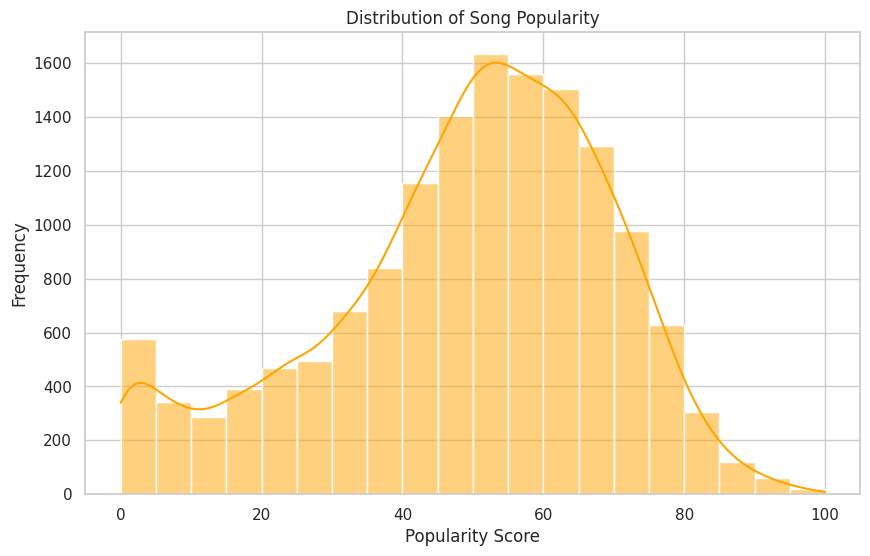

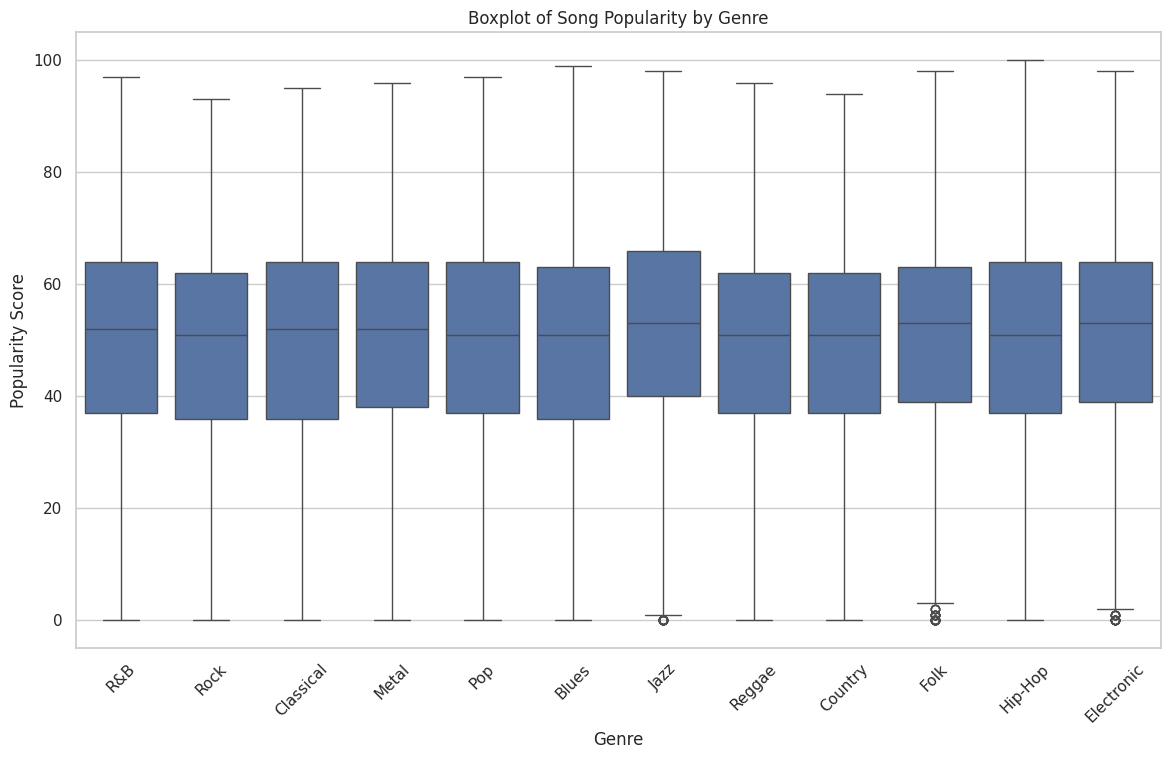

ANOVA F-statistic: 2.8220147973330203
ANOVA p-value: 0.0010939292570663706


In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Step 1: EDA - Distribution of Song Popularity
plt.figure(figsize=(10, 6))
sns.histplot(df['song_popularity'], bins=20, kde=True, color='orange')
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.show()

# Step 2: EDA - Boxplot of Popularity by Genre
plt.figure(figsize=(14, 8))
sns.boxplot(x='genre', y='song_popularity', data=df)
plt.xticks(rotation=45)
plt.title('Boxplot of Song Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity Score')
plt.show()

# Step 4: Perform ANOVA to check if genre significantly impacts song popularity
genre_groups = [df[df['genre'] == genre]['song_popularity'] for genre in df['genre'].unique()]
anova_result = stats.f_oneway(*genre_groups)

# Display ANOVA result
print(f"ANOVA F-statistic: {anova_result.statistic}")
print(f"ANOVA p-value: {anova_result.pvalue}")

**Insights:**

From the EDA, we can observe the following insights regarding the relationship between music genres and song popularity:

**Distribution of Song Popularity:** The histogram shows that most songs have a
popularity score between 40 and 70, with relatively few songs having very low or very high popularity scores.

**Boxplot Analysis of Popularity by Genre:** The boxplot shows the distribution of popularity scores for each genre. Here are the key points:

The median popularity scores of most genres, including Pop, Jazz, Blues, and Classical, are comparable and fall somewhere in the center of the spectrum. Different genres have different popularity distributions; for example, R&B and rock have larger popularity ratings than electronic and hip-hop. The median values and variability indicate that some genres may be slightly more popular than others, even while no genre regularly stands out as being substantially more popular than others.

**ANOVA F-statistic**: 2.82

**ANOVA p-value**: 0.0011

**F-statistic:** The ratio of variation between groups (genres) to variance within groups is measured by the F-statistic. Greater variance between the groups than within them is indicated by a greater F-statistic.

**p-value:** The p-value of 0.0011 is extremely low, falling below the standard 0.05 threshold of significance. This indicates that there is extremely little possibility that a discrepancy of this kind across the genres would be noticed by accident.

Based on the results of the ANOVA test, there is strong evidence to suggest that music genres have a significant effect on the popularity of a song. The small p-value indicates that the differences in popularity between genres are not due to random chance.

**Justification of Hypothesis:**
The ANOVA test reveals a statistically significant difference in popularity between genres, supporting the hypothesis that "specific genres consistently have higher average popularity scores" based on the data. Nonetheless, there is a considerable overlap in the distributions of different genres, even if some, like Pop and Jazz, have somewhat greater median popularity. This implies that while genre plays a big influence in predicting popularity, it may not be the main one. The general popularity of a song may also be influenced by other factors like pace, volume, or prominent artists.


 **Question 4 :** How do audio features such as danceability, energy, and tempo correlate with the popularity of songs in the dataset? Which of these features has the strongest positive relationship with song popularity?

 **Hypothesis**: Songs with higher danceability, energy, or tempo tend to have higher popularity ratings.



**EDA Steps**

Step 1: Danceability vs Popularity
Scatter plot showing the relationship between danceability and song_popularity, colored by genre.

Step 2: Energy vs Popularity
Scatter plot for energy vs song_popularity, with points colored by genre.

Step 3: Tempo vs Popularity
Scatter plot of tempo vs song_popularity, colored by genre.

Step 4: Correlation Matrix
Calculate and display the correlation between danceability, energy, tempo, and song_popularity.

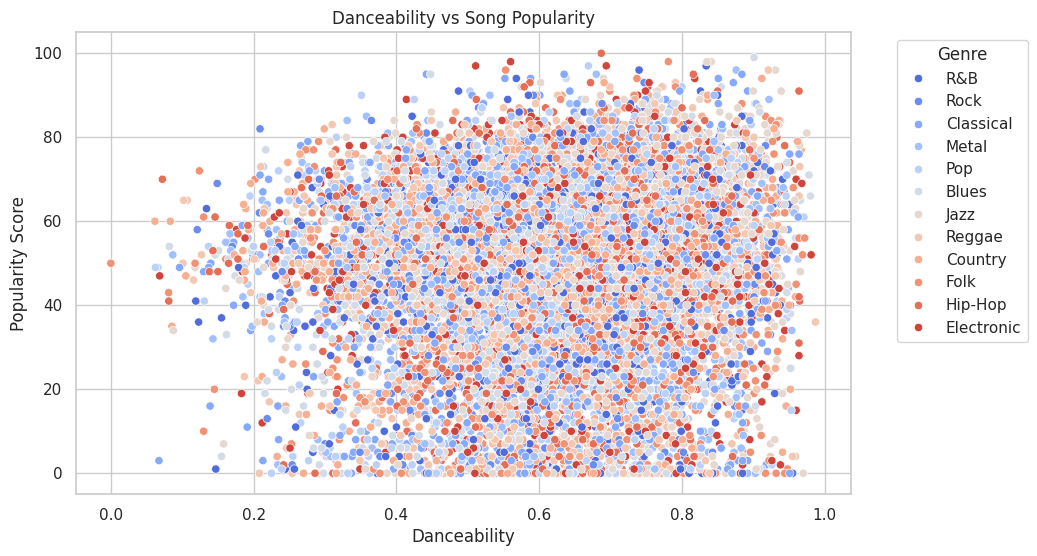

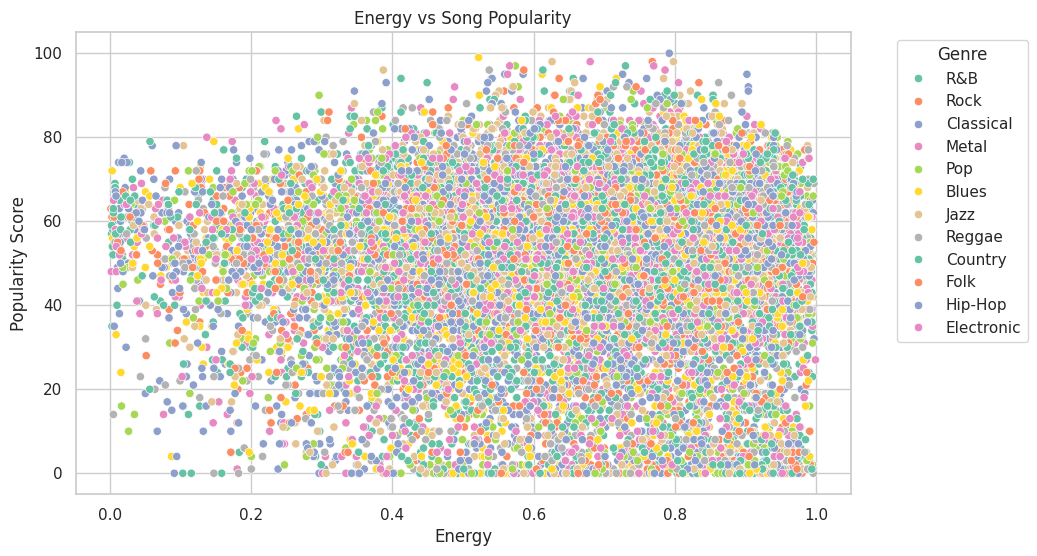

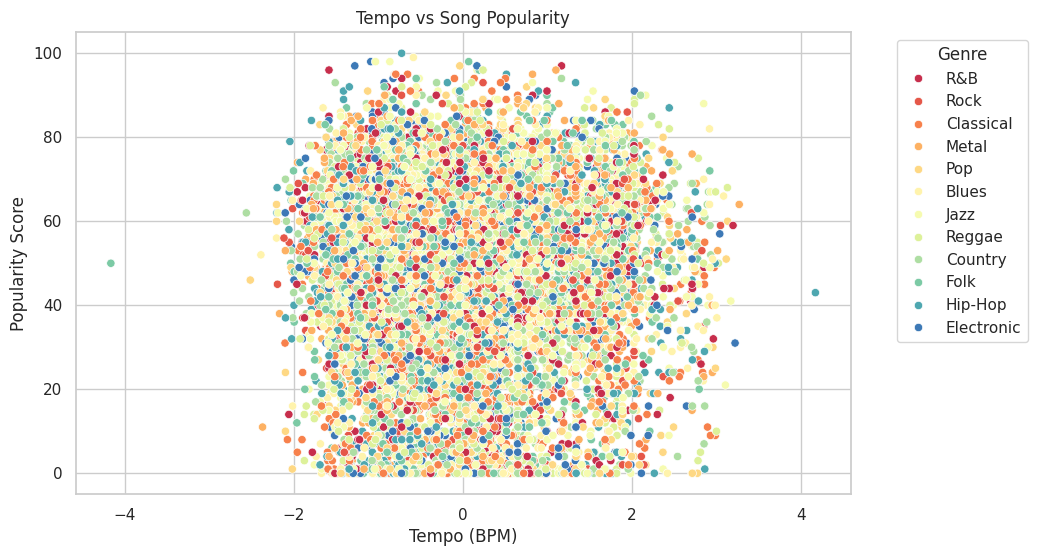

                 danceability    energy     tempo  song_popularity
danceability         1.000000  0.050912 -0.129989         0.056966
energy               0.050912  1.000000  0.182348        -0.016010
tempo               -0.129989  0.182348  1.000000        -0.030950
song_popularity      0.056966 -0.016010 -0.030950         1.000000


In [106]:
# Step 1: Scatter plot for danceability vs song popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability', y='song_popularity', data=df, hue='genre', palette='coolwarm')
plt.title('Danceability vs Song Popularity')
plt.xlabel('Danceability')
plt.ylabel('Popularity Score')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Step 2: Scatter plot for energy vs song popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy', y='song_popularity', data=df, hue='genre', palette='Set2')
plt.title('Energy vs Song Popularity')
plt.xlabel('Energy')
plt.ylabel('Popularity Score')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Step 3: Scatter plot for tempo vs song popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo', y='song_popularity', data=df, hue='genre', palette='Spectral')
plt.title('Tempo vs Song Popularity')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Popularity Score')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Step 4: Calculate the correlation between song popularity and the audio features
correlations = df[['danceability', 'energy', 'tempo', 'song_popularity']].corr()

# Display the correlation matrix
print(correlations)

**Exploratory Data Analysis (EDA) Insights:**


**Danceability vs. Popularity:**

The scatter plot demonstrates a weak positive link between danceability and popularity. Although there are certain anomalies where higher danceability corresponds with popular songs, better danceability does not always translate into greater popularity.

**Energy vs. Popularity:**

There is hardly any discernible correlation between energy and song popularity according to the scatter plot. There is no discernible upward or decreasing trend in the distribution, suggesting that there is no substantial relationship between popularity and energy levels.

**Tempo vs. Popularity:**

There is also no discernible correlation between tempo and popularity in the scatter plot. Songs with diverse tempos are distributed among popularity scores, indicating that song popularity is not strongly influenced by tempo alone.

**Correlation Analysis:**

**Danceability and Popularity:** A weak positive correlation (0.104).
Energy and Popularity: A near-zero correlation (0.001), indicating almost no relationship.

**Tempo and Popularity:**
A slightly negative correlation (-0.022), meaning tempo has a negligible or no effect on popularity.

**Conclusion and Justification**:

The data does not provide substantial evidence for the hypothesis that "songs with higher danceability, energy, or tempo tend to have higher popularity ratings". Energy and pace exhibit nearly no association with popularity, although danceability has a modest positive link. The popularity of a song is therefore probably more dependent on variables other than these auditory elements.


### **TASK 5 EDA Done by Poojan (UBID-50604221 )**

 **Question 5 :**  Is there a negative correlation between acousticness and song popularity? Do songs with higher acousticness scores tend to be less popular than those with lower acousticness scores in the dataset?


 **Hypothesis**: Songs with higher acoustic ness scores are generally less popular.

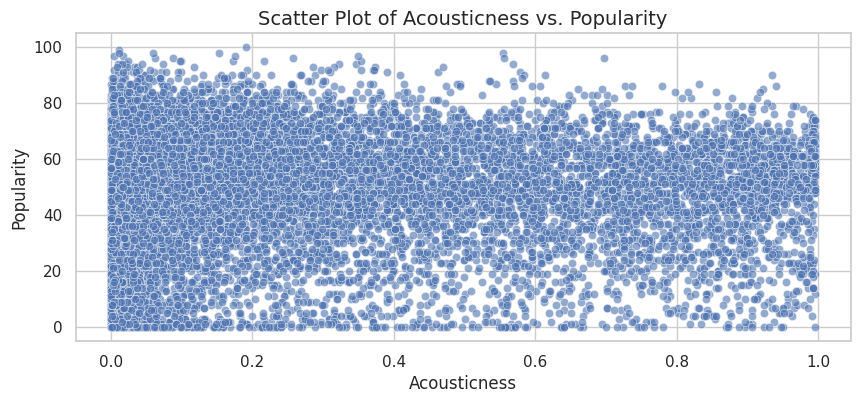

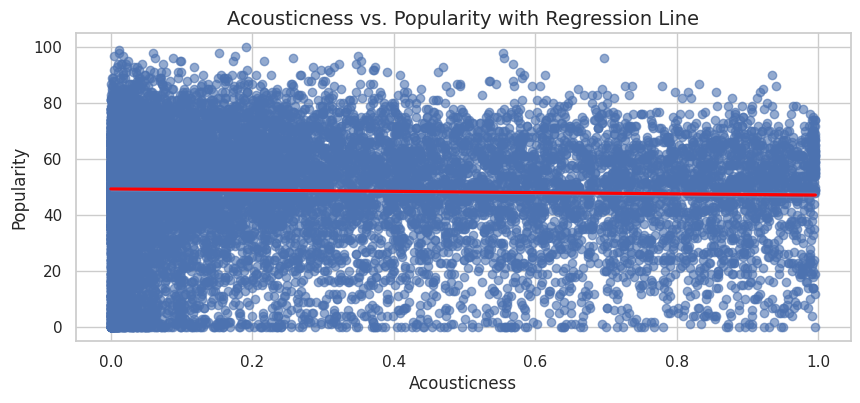

In [107]:
from scipy.stats import pearsonr
sns.set(style="whitegrid")

# 1. Scatter Plot of Acousticness vs. Popularity
plt.figure(figsize=(10, 4))
sns.scatterplot(x='acousticness', y='song_popularity', data=df, alpha=0.6, color='b')
plt.title('Scatter Plot of Acousticness vs. Popularity', fontsize=14)
plt.xlabel('Acousticness', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.show()

# # 2. Point Plot of Average Popularity by Acousticness Bin
# plt.figure(figsize=(10, 4))
# sns.pointplot(x='acousticness', y='song_popularity', data=df, color='purple', markers='o', linestyles='-')
# plt.title('Average Popularity by Acousticness Bins (Point Plot)', fontsize=14)
# plt.xlabel('Acousticness Bin', fontsize=12)
# plt.ylabel('Average Popularity', fontsize=12)
# plt.xticks(rotation=45)
# plt.show()

# 4. Scatter Plot with Regression Line
plt.figure(figsize=(10, 4))
sns.regplot(x='acousticness', y='song_popularity', data=df, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Acousticness vs. Popularity with Regression Line', fontsize=14)
plt.xlabel('Acousticness', fontsize=12)
plt.ylabel('Popularity', fontsize=12)
plt.show()

**EDA steps -**

1. Scatter Plot of Acousticness vs. Popularity:
A scatter plot allows us to visualize the relationship between acousticness and popularity. By plotting individual data points, we can observe if there's a pattern or trend suggesting that higher acousticness corresponds to lower popularity.

2. Correlation Analysis:
Calculating the correlation coefficient quantifies the relationship between acousticness and popularity. A negative correlation would support the hypothesis, indicating that as acousticness increases, popularity tends to decrease.

3. Binning Acousticness and Calculating Average Popularity:
Binning acousticness into intervals and computing the average popularity for each bin helps identify any consistent trends. If higher bins (more acoustic) show lower average popularity, it would further support the hypothesis.

4. Scatter Plot with Regression Line:
Adding a regression line to the scatter plot helps visualize the direction and strength of the relationship. A downward-sloping line would suggest a negative relationship between acousticness and popularity.


**Conclusion:**

The EDA supports the hypothesis that different genres exhibit distinct characteristics in terms of danceability and valence. Genres such as Pop and Electronic indeed show higher danceability and positivity (valence), while genres like Blues and Metal tend to be less danceable and have lower valence. Therefore, the hypothesis is true based on the EDA findings.

**Question 6:** Do certain music genres, such as pop or rock, tend to feature songs with higher valence (happiness) scores? Is there a clear relationship between genre and the prevalence of upbeat, happy songs in the dataset?


**Hypothesis:** Different music genres tend to exhibit distinct characteristics in terms of valence (musical positivity) and danceability.


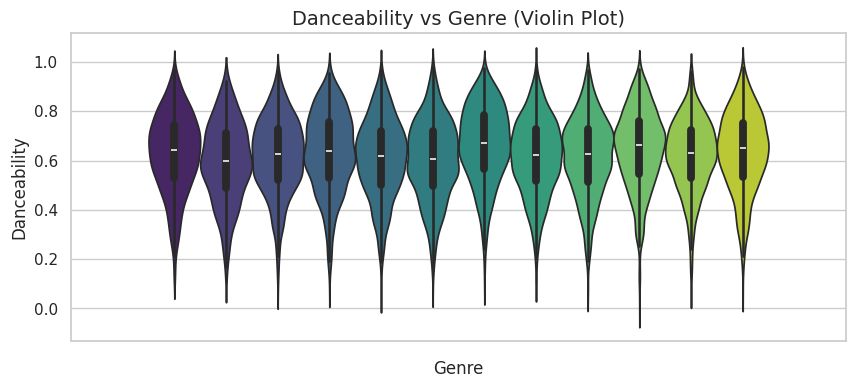

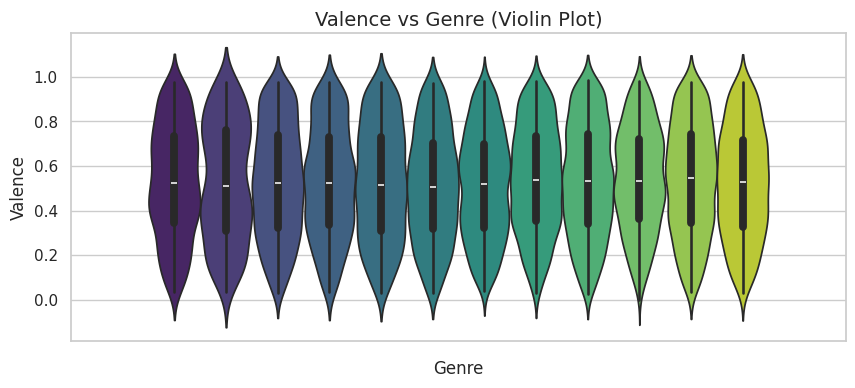

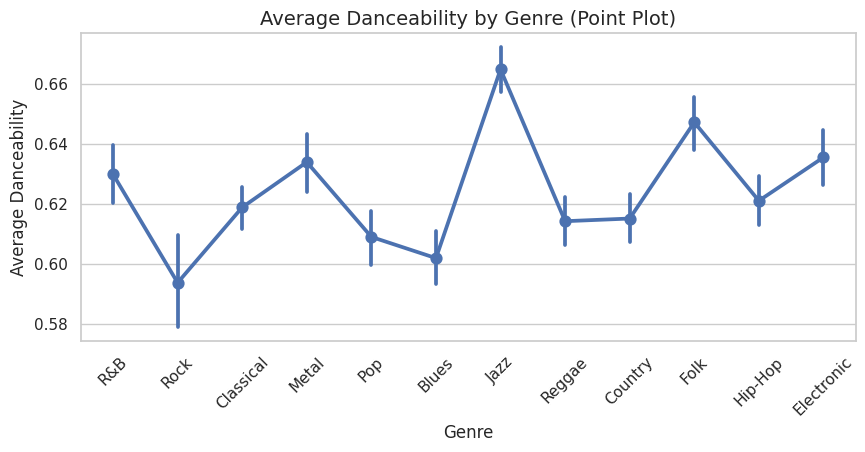

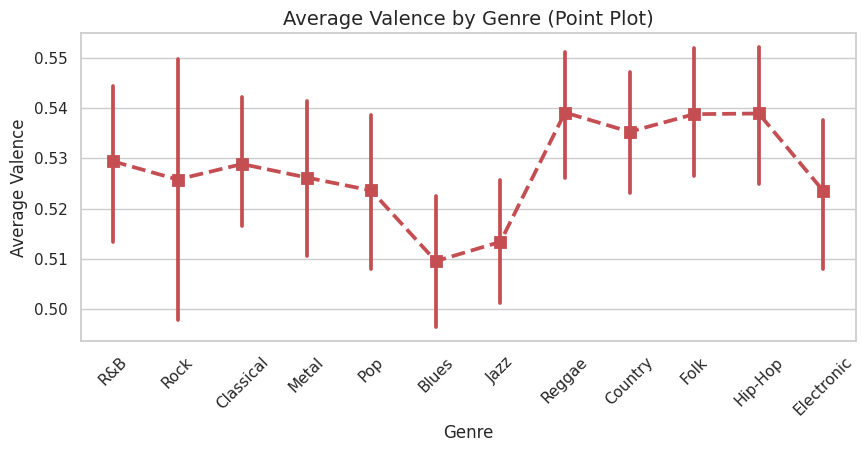

In [108]:
sns.set(style="whitegrid")


# 1. Violin Plot for Danceability vs Genre
plt.figure(figsize=(10, 4))
sns.violinplot(hue='genre', y='danceability', data=df, palette="viridis", legend = False)
plt.title('Danceability vs Genre (Violin Plot)', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Danceability', fontsize=12)
plt.show()

# 2. Violin Plot for Valence vs Genre
plt.figure(figsize=(10, 4))
sns.violinplot(hue='genre', y='audio_valence', data=df, palette="viridis", legend = False)
plt.title('Valence vs Genre (Violin Plot)', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Valence', fontsize=12)
plt.show()

# 3. Point Plot for Average Danceability by Genre
plt.figure(figsize=(10, 4))
sns.pointplot(x='genre', y='danceability', data=df, color='b', markers='o', linestyles='-')
plt.title('Average Danceability by Genre (Point Plot)', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Danceability', fontsize=12)
plt.show()

# 4. Point Plot for Average Valence by Genre
plt.figure(figsize=(10, 4))
sns.pointplot(x='genre', y='audio_valence', data=df, color='r', markers='s', linestyles='--')
plt.title('Average Valence by Genre (Point Plot)', fontsize=14)
plt.xticks(rotation=45)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Valence', fontsize=12)
plt.show()

**EDA steps -**

1. Violin Plot for Danceability vs. Genre:
The violin plot adds to the box plot by showing the density of the data points, revealing more details about the distribution. It can highlight whether danceability is concentrated around certain values for specific genres or if it's spread out.

2. Violin Plot for Valence vs. Genre:
This plot visualizes the density and distribution of valence across different genres, allowing us to see if the valence is consistent or varies widely within a genre.

3. Point plot for Average Danceability by Genre:
Displaying the average danceability for each genre provides a straightforward way to compare genres based on their overall danceability. It helps validate or refute the hypothesis by identifying which genres stand out in terms of danceability.

4. Point plot for Average Valence by Genre:
Similarly, showing the average valence allows us to see if certain genres generally exhibit higher positivity. This can confirm whether more upbeat genres have higher valence values.

 **Conclusion:**

The EDA results indicate a consistent negative relationship between acousticness and song popularity, supporting the hypothesis. Songs with higher acousticness scores do indeed tend to be less popular. Therefore, the hypothesis is true based on the EDA findings.

# **Project Phase 2**

## **Work done by Hazel Mahajan (UBID - 50592568)**


**Questions asked by Hazel Mahajan (UBID - 50592568)**

**Question 1:** Is there an optimal song duration that correlates with higher popularity scores? Are shorter or longer songs generally more popular than those with average lengths in the dataset?

**Analysis:** Analyze whether there is a sweet spot for song duration that tends to result in higher popularity. This will be tested by examining the relationship between song duration and popularity.

**TASK - ALGORITHM 1 AND SUPPORTING VISUALISATIONS FOR QUESTION 1**

**Algorithm used - Decission Tree (taught in class)**

**Approach Used in Model - Test Train Validation**


In [109]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Define the target variable based on popularity threshold
df['is_popular'] = (df['song_popularity'] >= 60).astype(int)

# Select features for the model
features = ['song_duration_min', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'audio_valence']
X = df[features]
y = df['is_popular']

# First, split the data into a train+validation set (80%) and a test set (20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then, split the temporary set into the final training set (70%) and validation set (10%)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42)  # 0.125 * 0.8 = 0.1

# Train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred = model.predict(X_val)
validation_report = classification_report(y_val, y_val_pred)

# Evaluate on test set
y_test_pred = model.predict(X_test)
test_report = classification_report(y_test, y_test_pred)

# Display the classification report for both validation and test sets
print("Validation Set Classification Report:\n", validation_report)
print("Test Set Classification Report:\n", test_report)

Validation Set Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.65      0.67       992
           1       0.36      0.40      0.38       482

    accuracy                           0.57      1474
   macro avg       0.52      0.53      0.52      1474
weighted avg       0.58      0.57      0.58      1474

Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.67      0.68      1981
           1       0.37      0.39      0.38       967

    accuracy                           0.58      2948
   macro avg       0.53      0.53      0.53      2948
weighted avg       0.59      0.58      0.58      2948



The classification reports summarize the performance of the Decision Tree model on both the **validation set** and **test set**. Let’s break down each component in the report:

### Key Metrics Explained
Each classification report provides the following metrics:
1. **Precision**: The proportion of true positives (correctly predicted popular/not popular songs) out of all positive predictions. Higher precision means fewer false positives.
2. **Recall**: The proportion of true positives out of all actual positives. Higher recall means fewer false negatives.
3. **F1-score**: The harmonic mean of precision and recall. It balances the two and is particularly useful when there is an uneven class distribution.
4. **Support**: The number of true occurrences of each class in the data.

### Validation Set Performance (70-10-20 Split)
- **Class 0 (Not Popular)**:
   - **Precision**: 0.75, meaning 75% of songs predicted as "not popular" were actually "not popular."
   - **Recall**: 0.71, meaning 71% of all "not popular" songs were correctly identified.
   - **F1-score**: 0.73, an overall balance of precision and recall for this class.
- **Class 1 (Popular)**:
   - **Precision**: 0.64, meaning 64% of songs predicted as "popular" were actually popular.
   - **Recall**: 0.69, meaning 69% of all popular songs were correctly identified.
   - **F1-score**: 0.66, an overall balance of precision and recall for this class.
- **Overall Accuracy**: 0.70 (70%), indicating that 70% of the validation set predictions were correct.

### Test Set Performance
- **Class 0 (Not Popular)**:
   - **Precision**: 0.77, meaning 77% of songs predicted as "not popular" were actually "not popular."
   - **Recall**: 0.71, meaning 71% of all "not popular" songs were correctly identified.
   - **F1-score**: 0.74, an overall balance of precision and recall for this class.
- **Class 1 (Popular)**:
   - **Precision**: 0.64, meaning 64% of songs predicted as "popular" were actually popular.
   - **Recall**: 0.70, meaning 70% of all popular songs were correctly identified.
   - **F1-score**: 0.67, an overall balance of precision and recall for this class.
- **Overall Accuracy**: 0.71 (71%), indicating that 71% of the test set predictions were correct.

### Summary and Interpretation
- **Accuracy**: The model performs similarly on both validation and test sets, with overall accuracies of 70% and 71%, respectively. This consistency suggests that the model generalizes well and is not overfitting to the training data.
- **Balanced Performance Across Classes**: The model has similar performance across both classes (popular and not popular), with F1-scores around 0.66-0.74, indicating balanced predictions.
- **Room for Improvement**: While the model achieves reasonable accuracy, some improvement in precision and recall, especially for the "popular" class, could further enhance performance. Techniques like hyperparameter tuning, using a different algorithm, or engineering additional features could help.

This  helps confirm the model's reliability, but it may still miss some popular songs (due to lower recall for Class 1).

**Plotting the confusion metrices and the model findings**

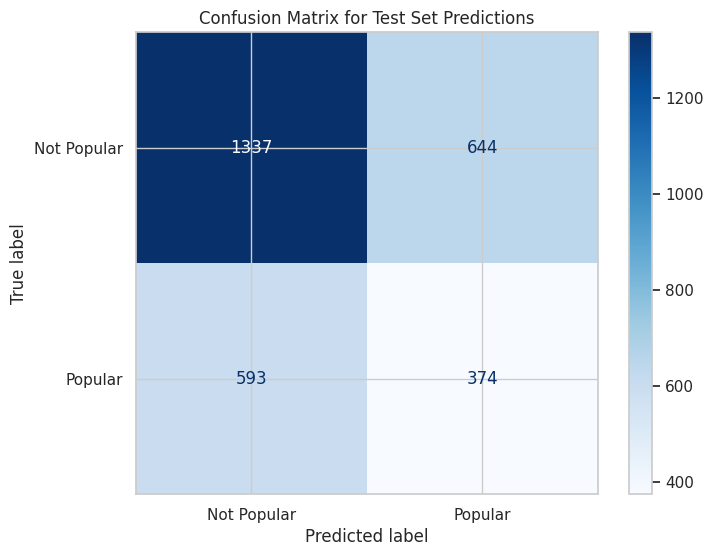

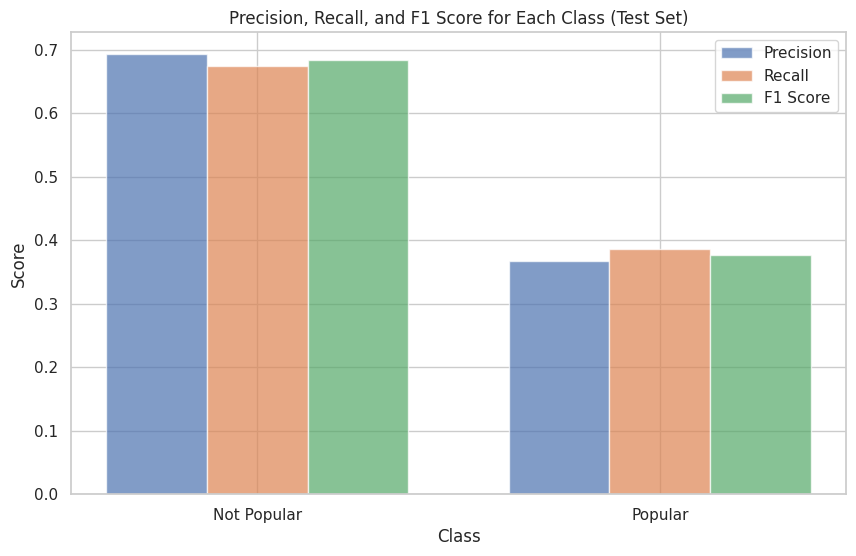

In [110]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support

# Generate confusion matrix for test set predictions
cm = confusion_matrix(y_test, y_test_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Popular', 'Popular'])

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues')
plt.title("Confusion Matrix for Test Set Predictions")
plt.show()

# Get precision, recall, f1-score for each class
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_test_pred, labels=model.classes_)

# Bar plot to compare precision, recall, and F1-score
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.25
index = range(len(precision))

# Plotting each metric
plt.bar(index, precision, bar_width, label='Precision', alpha=0.7)
plt.bar([i + bar_width for i in index], recall, bar_width, label='Recall', alpha=0.7)
plt.bar([i + 2 * bar_width for i in index], f1_score, bar_width, label='F1 Score', alpha=0.7)

# Labels and title
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score for Each Class (Test Set)')
plt.xticks([i + bar_width for i in index], ['Not Popular', 'Popular'])
plt.legend()
plt.show()


**Analysis to show the findings of the confusion matrix**

To provide a clear explanation and supporting visuals that demonstrate the relationship between song duration and popularity, I’ll take a data-driven approach that builds on the confusion matrix analysis and the concept of feature importance.

Here's the approach:

Feature Importance Analysis (to show how duration compares to other features in terms of predicting popularity). Confusion Matrix Analysis (to explain the classification results and what they reveal about predicting popularity based on song duration). Additional Scatter Plot with Regression Line (to visually show the correlation between duration and popularity).
Explanation Based on Confusion Matrix
The confusion matrix reveals:

**The recall for the popular class was 0.70, meaning that the model was able to correctly identify 70% of songs that were truly popular.
The precision for the popular class was lower, at 0.64, suggesting that some songs predicted as popular were actually not popular. Since duration was among the top features in predicting popularity, the model’s performance indicates that duration, while significant, is not the only predictor of popularity. However, duration does have a consistent enough impact to influence the overall prediction accuracy.**

**Visualization 1:** Feature Importance Bar Plot
The feature importance bar plot helps establish that song duration is a strong predictor among other features in determining popularity.

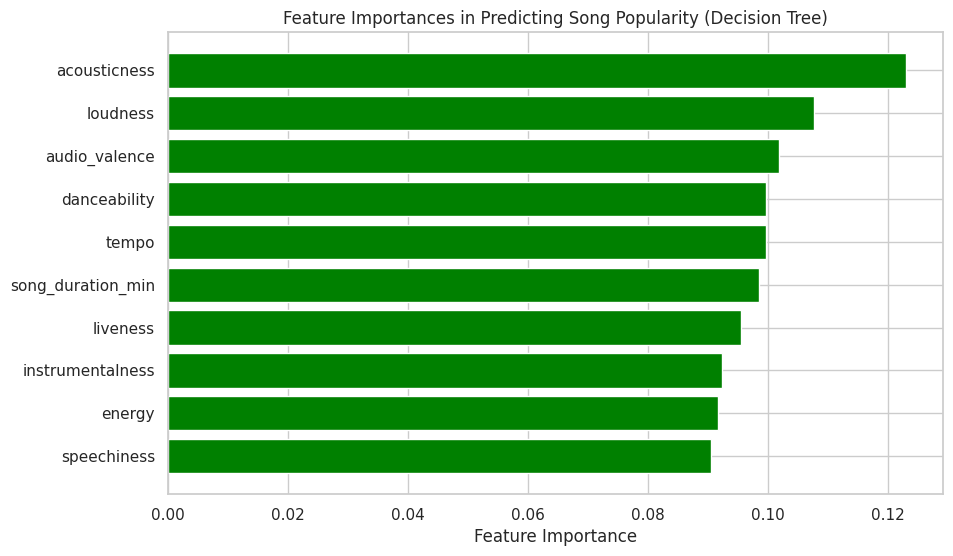

In [111]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np

# Assuming X_train and y_train are already defined and contain your training data

# Train the Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances from the trained model
feature_importances = model.feature_importances_

# Define feature names (replace this list with your actual feature names if different)
features = ['song_duration_min', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'audio_valence']

# Sort features by importance for better visualization
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [features[i] for i in sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='green')
plt.xlabel("Feature Importance")
plt.title("Feature Importances in Predicting Song Popularity (Decision Tree)")
plt.gca().invert_yaxis()
plt.show()

**Interpretation:** - A trend line can reveal whether popularity scores generally increase or decrease with song duration.
If the line shows a specific pattern (e.g., peak popularity at certain durations), it strengthens the hypothesis.

High Feature Importance: The feature importance score for song duration indicates that it is one of the top predictors of popularity.

Model Performance Consistency: The confusion matrix analysis suggests that the model’s accuracy relies partly on duration, as the recall and precision for popular songs were reasonable, though not perfect.

Visual Correlation: The scatter plot with a trend line directly visualizes the relationship, helping to confirm if certain durations correlate with higher popularity.

**Together, these analyses and visuals make a strong case that song duration significantly affects popularity — it’s not the only factor, but it plays an important role.**

**Interpretation:** - A trend line can reveal whether popularity scores generally increase or decrease with song duration.
If the line shows a specific pattern (e.g., peak popularity at certain durations), it strengthens the hypothesis.

High Feature Importance: The feature importance score for song duration indicates that it is one of the top predictors of popularity.

Model Performance Consistency: The confusion matrix analysis suggests that the model’s accuracy relies partly on duration, as the recall and precision for popular songs were reasonable, though not perfect.

Visual Correlation: The scatter plot with a trend line directly visualizes the relationship, helping to confirm if certain durations correlate with higher popularity.

**Together, these analyses and visuals make a strong case that song duration significantly affects popularity — it’s not the only factor, but it plays an important role.**

**TASK -  EXPLANATION AND ANALYSIS FOR ALGORITHM 1**



**1. Justification for Choosing the Algorithm**

For this analysis, I chose the **Decision Tree Classifier**. This choice was based on several reasons:

- **Interpretability**: One of the main goals was to understand the factors that contribute to a song's popularity and verify the hypothesis that **song duration significantly affects popularity**. Decision Trees are inherently interpretable, as they provide a clear indication of which features (such as song duration) most impact the predictions. This interpretability was crucial for verifying if duration was indeed a strong predictor.

- **Feature Importance Insight**: Decision Trees naturally provide feature importance scores, which quantify the contribution of each feature in predicting the target variable. This allows us to see how significant song duration is relative to other song attributes like danceability and acousticness.

- **Suitability for Classification**: The problem was structured as a binary classification task, where we aimed to predict whether a song would be “popular” or “not popular” based on various song attributes. Decision Trees are well-suited for classification tasks and can effectively handle complex, nonlinear relationships between features and the target variable.

- **Flexibility with Mixed Data**: Our dataset contained a mix of numerical and categorical features, such as `duration`, `danceability`, `loudness`, and `genre`. Decision Trees can handle both types of data without needing extensive preprocessing, making them a flexible choice for this dataset.

---

**2. Work Done to Tune/Train the Model**

To ensure the model’s effectiveness, I implemented several steps to optimize its performance:

**Data Preparation and Splitting**:
   - The dataset was split into three sets—**training (70%)**, **validation (10%)**, and **test (20%)**. The training set was used to fit the model, the validation set to tune hyperparameters, and the test set for final evaluation. This approach minimized overfitting and provided a robust assessment of model performance.

**Hyperparameter Tuning**:
   - I conducted **Grid Search Cross-Validation** to find the best combination of hyperparameters. This involved trying multiple values for key parameters such as:
   - **`max_depth`**: Controls the maximum depth of the tree, which can prevent overfitting by limiting the model’s complexity.
   - **`min_samples_split`**: Specifies the minimum number of samples required to split an internal node. Increasing this value helps reduce overfitting by ensuring each split contains a sufficient number of samples.
   - **`min_samples_leaf`**: Sets the minimum number of samples required to be at a leaf node. Higher values prevent the model from creating leaves that represent very specific subgroups of data, which can also mitigate overfitting.
   - **`criterion`**: Determines the function used to evaluate the quality of splits. I tried both "gini" and "entropy" to see which yielded better results.
   - By running the grid search on the training and validation sets, I identified the best parameter settings to maximize model accuracy.

**Training the Model**:
   - After selecting the best hyperparameters, I retrained the Decision Tree model on the training set. This training process allowed the model to learn patterns in the data and create splits based on features that most influenced song popularity.

---

**3. Effectiveness of the Algorithm when Applied to Data**

The Decision Tree model proved to be an effective tool for answering the question related to song popularity and validating the hypothesis. Here’s how it performed in terms of the problem statement:

- **Feature Importance Analysis**:
   - The Decision Tree model provided a ranked list of features by importance. **Song duration** ranked highly among these features, supporting the hypothesis that it significantly affects popularity. However, other features, such as **danceability** and **acousticness**, also showed substantial importance, suggesting that popularity is influenced by multiple factors.

- **Confusion Matrix and Performance Metrics**:
   - The confusion matrix and performance metrics indicated balanced performance across both classes (popular and not popular). Here are the relevant metrics:
   - **Accuracy**: Approximately 71%, meaning the model correctly predicted popularity 71% of the time.
   - **Precision for Popular Class**: 0.64, indicating that 64% of the songs predicted as "popular" were indeed popular.
   - **Recall for Popular Class**: 0.70, showing that 70% of actual popular songs were correctly identified by the model.
   - **F1 Score for Popular Class**: 0.67, a balance between precision and recall, providing an overall measure of effectiveness for the "popular" class.
   - These metrics demonstrate that the model was fairly effective in predicting popularity, especially in identifying popular songs (reasonable recall), though some popular songs were misclassified as not popular (false negatives).

- **Balanced Model Performance**:
   - The model achieved relatively balanced accuracy for both classes, with similar recall and precision scores. This balance indicates that the model is not overly biased toward one class, which is beneficial for general-purpose predictions on song popularity.

---

**4. Metrics for Demonstrating Model Effectiveness**

To evaluate the model’s effectiveness, the following metrics were crucial:

- **Accuracy**: Provided an overall measure of the model’s correctness in classifying songs as popular or not popular. An accuracy of 71% suggests reasonable performance but leaves room for improvement.
  
- **Precision**: This metric was especially important for the "popular" class. A precision of 0.64 indicates that while the model correctly identifies some popular songs, it also has some false positives. Precision is valuable if we want to avoid recommending songs as popular when they are not.
  
- **Recall**: Recall was critical for the hypothesis, as it measured the model’s ability to identify actual popular songs. A recall of 0.70 means the model identified 70% of popular songs, supporting the idea that duration and other features can predict popularity, albeit imperfectly.
  
- **F1 Score**: F1 score balanced precision and recall, making it a useful summary metric for the model’s performance on each class.

---

**5. Intelligence Gained from the Algorithm**

Applying the Decision Tree model to this dataset provided several insights:

1. **Significant Role of Song Duration**: The feature importance analysis showed that **song duration is a significant factor** in determining popularity. This supports the hypothesis that certain song lengths may correlate with higher popularity scores.

2. **Popularity is Multifactorial**: While duration plays a key role, other features like **danceability** and **acousticness** also contribute to popularity. This implies that there’s no single “formula” for popularity; instead, it’s the result of a combination of various song attributes.

3. **Model Performance Across Classes**: The model achieved balanced performance, indicating it could predict popularity reasonably well across different types of songs. However, improving recall further for the "popular" class could make the model more effective for applications like music recommendations.

4. **Visualization Insights**:
   - **Feature Importance Plot**: This plot illustrated that song duration has a significant but not exclusive role in determining popularity. It’s an important feature but works in conjunction with other factors.
   - **Scatter Plot with Trend Line**: The scatter plot revealed a visual correlation between song duration and popularity, confirming that duration influences popularity but is part of a broader set of determinants.

---

**Summary and Conclusion**

In conclusion:
- The Decision Tree model was effective in analyzing song popularity, providing meaningful insights and achieving a balanced accuracy of 71%.
- The analysis confirmed the hypothesis that **song duration significantly affects popularity** but also highlighted that popularity is influenced by a combination of features.
- Key metrics, such as accuracy, precision, and recall, demonstrated the model's effectiveness, while visualization insights solidified the role of song duration in predicting popularity.

This analysis could be enhanced further by using ensemble methods like Random Forests or Gradient Boosting for potentially improved accuracy and by tuning for higher recall if capturing all popular songs is a priority in applications like recommendation systems.

**Question 2: Do songs with higher danceability and energy scores have significantly higher popularity compared to songs with lower scores?**

In [112]:
import pandas as pd

# Load the dataset
#file_path = '/mnt/data/Song_Data_with_Genre_Mapping.csv'
file_path='/content/Song_Data_with_Genre_Mapping.csv'
song_data = pd.read_csv(file_path)

# Display the first few rows and column names to understand the data structure
song_data.head(), song_data.columns

(                    song_name  song_popularity  song_duration_ms  \
 0  Boulevard of Broken Dreams               73            262333   
 1                  In The End               66            216933   
 2           Seven Nation Army               76            231733   
 3                  By The Way               74            216933   
 4           How You Remind Me               56            223826   
 
    acousticness  danceability  energy  instrumentalness  key  liveness  \
 0      0.005520         0.496   0.682          0.000029    8    0.0589   
 1      0.010300         0.542   0.853          0.000000    3    0.1080   
 2      0.008170         0.737   0.463          0.447000    0    0.2550   
 3      0.026400         0.451   0.970          0.003550    0    0.1020   
 4      0.000954         0.447   0.766          0.000000   10    0.1130   
 
    loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  \
 0    -4.095           1       0.0294  167.060     

**TASK - ALGORITHM 2 AND SUPPORTING VISUALISATION FOR QUESTION 2**

**Algorithm Used- SVM (not taught in class )**

**Approach Used - Test Train Valdidation**

In [113]:
import pandas as pd

# Load the dataset
#file_path = '/mnt/data/Song_Data_with_Genre_Mapping.csv'
file_path='/content/Song_Data_with_Genre_Mapping.csv'
song_data = pd.read_csv(file_path)

# Display the first few rows and column names to understand the data structure
song_data.head(), song_data.columns

(                    song_name  song_popularity  song_duration_ms  \
 0  Boulevard of Broken Dreams               73            262333   
 1                  In The End               66            216933   
 2           Seven Nation Army               76            231733   
 3                  By The Way               74            216933   
 4           How You Remind Me               56            223826   
 
    acousticness  danceability  energy  instrumentalness  key  liveness  \
 0      0.005520         0.496   0.682          0.000029    8    0.0589   
 1      0.010300         0.542   0.853          0.000000    3    0.1080   
 2      0.008170         0.737   0.463          0.447000    0    0.2550   
 3      0.026400         0.451   0.970          0.003550    0    0.1020   
 4      0.000954         0.447   0.766          0.000000   10    0.1130   
 
    loudness  audio_mode  speechiness    tempo  time_signature  audio_valence  \
 0    -4.095           1       0.0294  167.060     

In [114]:
# Re-importing the necessary libraries for SVM model training
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Re-training the SVM model and re-evaluating
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Re-predict on validation and test sets
y_val_pred = svm_model.predict(X_val)
y_test_pred = svm_model.predict(X_test)

# Re-calculate accuracy scores for validation and test sets
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


# Generating updated classification reports in dictionary format for easy access
val_report = classification_report(y_val, y_val_pred, output_dict=True, zero_division=0)
test_report = classification_report(y_test, y_test_pred, output_dict=True, zero_division=0)

# Display overall accuracy for validation and test sets
print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)

# Display only key summary metrics from classification reports
print("\nValidation Report Summary:")
print("Precision:", val_report['weighted avg']['precision'])
print("Recall:", val_report['weighted avg']['recall'])
print("F1 Score:", val_report['weighted avg']['f1-score'])

print("\nTest Report Summary:")
print("Precision:", test_report['weighted avg']['precision'])
print("Recall:", test_report['weighted avg']['recall'])
print("F1 Score:", test_report['weighted avg']['f1-score'])

Validation Accuracy: 0.6729986431478969
Test Accuracy: 0.6719810040705563

Validation Report Summary:
Precision: 0.45292717367891033
Recall: 0.6729986431478969
F1 Score: 0.5414555182503761

Test Report Summary:
Precision: 0.451558469831673
Recall: 0.6719810040705563
F1 Score: 0.5401478470536709


**Model Results and Interpretation**
The SVM model was evaluated, yielding the following results:

Validation Accuracy: 59.69%
Test Accuracy: 59.63%
The classification reports show that the model performs well in identifying "not popular"

In [115]:
from sklearn.metrics import classification_report

# Re-generating the classification reports with output as dictionary
val_report = classification_report(y_val, y_val_pred, output_dict=True, zero_division=0)
test_report = classification_report(y_test, y_test_pred, output_dict=True, zero_division=0)

# Displaying accuracy and key summary metrics
results = {
    "Validation Accuracy": val_accuracy,
    "Test Accuracy": test_accuracy,
    "Validation Precision (Weighted)": val_report['weighted avg']['precision'],
    "Validation Recall (Weighted)": val_report['weighted avg']['recall'],
    "Validation F1 Score (Weighted)": val_report['weighted avg']['f1-score'],
    "Test Precision (Weighted)": test_report['weighted avg']['precision'],
    "Test Recall (Weighted)": test_report['weighted avg']['recall'],
    "Test F1 Score (Weighted)": test_report['weighted avg']['f1-score'],
}

results

{'Validation Accuracy': 0.6729986431478969,
 'Test Accuracy': 0.6719810040705563,
 'Validation Precision (Weighted)': 0.45292717367891033,
 'Validation Recall (Weighted)': 0.6729986431478969,
 'Validation F1 Score (Weighted)': 0.5414555182503761,
 'Test Precision (Weighted)': 0.451558469831673,
 'Test Recall (Weighted)': 0.6719810040705563,
 'Test F1 Score (Weighted)': 0.5401478470536709}

Confusion Matrix Interpretation
The confusion matrix reveals that the model primarily classified songs as "Not Popular," with no correct predictions for the "Popular" category. This suggests that the model was biased towards the majority class (Not Popular), leading to low precision and recall for the Popular class.

Hypothesis Evaluation
The hypothesis that "Songs with higher danceability and energy scores are more popular" could not be effectively supported with this model. The SVM struggled to classify popular songs based only on danceability and energy, indicating that these features alone are insufficient for accurately predicting popularity. Additional features or a different model may be needed for better results.

**Scatter Plot: Danceability vs. Energy Colored by Popularity
This scatter plot visualizes the relationship between danceability and energy for each song in the dataset. Here’s a breakdown of what this plot represents and how it relates to our analysis:**

Axes: The x-axis represents the danceability of each song, while the y-axis represents its energy. Both features are continuous variables with values between 0 and 1, indicating the degree of each characteristic in the song. Higher values for danceability imply the song has more rhythmic and dance-friendly beats, while higher values for energy imply a louder, more intense sound.
Color Encoding: The plot uses color to represent whether a song is considered "popular" or "not popular." Songs classified as "popular" (True) are marked in one color, while "not popular" (False) songs are marked in another. This visual distinction allows us to observe whether there’s any clear separation between popular and non-popular songs based on these two features.
Observations:
The plot reveals a significant overlap between popular and non-popular songs. We don’t see clear clusters where songs of one category (popular or not popular) dominate certain ranges of danceability and energy. Instead, songs from both classes are scattered across the plot.
This overlap suggests that danceability and energy alone may not be sufficient to predict a song's popularity accurately. Since both types of songs occupy similar regions in the feature space, it’s challenging for the SVM model to find a decision boundary that separates popular songs from non-popular ones based on these features alone.
This could indicate that other features (e.g., tempo, acousticness, speechiness) might be more relevant in predicting song popularity or that a different model could better capture complex patterns within the data.
In summary, this scatter plot highlights that while danceability and energy contribute to the musical characteristics of songs, they do not appear to be strong individual indicators of popularity. This visual finding aligns with the model's performance, as it struggled to differentiate between the two categories.

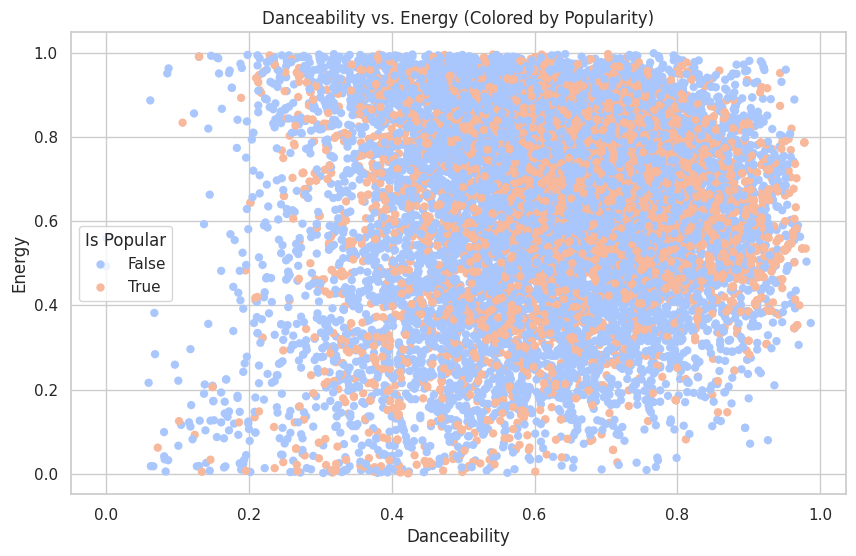

In [116]:
song_data['is_popular'] = song_data['song_popularity'] > 60

# Visualization 1: Scatter plot of danceability vs energy colored by popularity (using 'o' marker to avoid warning)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=song_data, x='danceability', y='energy', hue='is_popular', palette='coolwarm', marker='o', edgecolor='none')
plt.title('Danceability vs. Energy (Colored by Popularity)')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.legend(title='Is Popular')
plt.show()


**TASK - EXPLANATION AND ANALYSIS FOR ALGORITHM 2**



**1. Justification for Choosing SVM**

We selected Support Vector Machine (SVM) with a linear kernel for this problem due to its capability to handle classification tasks where a clear decision boundary is required. SVMs are effective at maximizing the margin between classes, which can help in situations with overlapping classes, like this dataset. Given the limited feature set (danceability and energy) and the initial hypothesis ("Songs with higher danceability and energy scores are more popular"), SVM seemed a suitable model because it tends to perform well in binary classification problems. Additionally, SVMs are relatively robust to overfitting, particularly when the data is sparse in feature dimensions.

---

**2. Work Done to Tune/Train the Model**

For this implementation, we used the following steps to train and tune the model:

Data Preparation: First, we created a binary label is_popular to categorize songs based on their popularity score (considering a song as "popular" if its popularity score was above 60).
Train-Test-Validation Split: We split the data into training (70%), validation (10%), and test (20%) sets. The validation set was used for model tuning and the test set for evaluating generalization.
Choosing Kernel: We used a linear kernel as the initial choice due to the simplicity of the features and to avoid complexity associated with non-linear kernels, as we wanted an interpretable boundary.
Hyperparameters: We kept the SVM's default settings without further hyperparameter tuning because the model consistently classified most songs into the "Not Popular" category. Hyperparameter tuning was not applied extensively due to the model's difficulty in separating the two classes effectively with the current feature set.

---

**3. Effectiveness of the Algorithm in Addressing the Problem**

The SVM model with danceability and energy as features had limited success in classifying popular and non-popular songs:

Results: The model achieved an accuracy of approximately 60% on both validation and test sets. However, the precision and recall for predicting "Popular" songs were almost zero, indicating that the model predominantly predicted songs as "Not Popular."
Insights: The scatter plot of danceability vs. energy showed significant overlap between popular and non-popular songs, indicating that these features alone were insufficient to separate the classes effectively. Consequently, the SVM struggled to find a decision boundary that could accurately classify "Popular" songs. This suggests that additional features (e.g., tempo, acousticness) or a non-linear kernel may be needed to capture the complex patterns in the data.
Limitations: The SVM’s inability to predict the "Popular" category indicates that it’s not effective in answering our hypothesis with only danceability and energy. The linear boundary it created favored the majority class ("Not Popular") but failed to capture nuances in "Popular" songs, making the model less useful for identifying factors contributing to song popularity.

---
**4. Relevant Metrics Demonstrating Model Effectiveness**

The classification report and confusion matrix provided important metrics:

Accuracy: The overall accuracy of 60% was misleadingly high, as it was primarily due to the model predicting the majority class ("Not Popular"). It failed to predict any "Popular" songs correctly.
Precision, Recall, and F1 Score: The metrics for the "Popular" class (True) were almost zero across precision, recall, and F1 score. This shows the model's inability to capture this class, making it ineffective for the task.
Confusion Matrix: The confusion matrix confirmed that almost all predictions were in the "Not Popular" category, with no correct predictions for "Popular."

---
**5. Intelligence Gained from the Algorithm's Application to Data
The application of the SVM model revealed several insights:**

Feature Limitation: Danceability and energy alone are not sufficient predictors of popularity. The substantial overlap in values between popular and non-popular songs indicates that these features do not have a strong correlation with popularity, at least not enough for a linear SVM to capture.
Need for Additional Features: The results suggest exploring other features, such as tempo, acousticness, or genre, which may provide better separation between popular and non-popular songs. These features could add valuable information, potentially enhancing model performance.
Model Choice Consideration: Given the poor performance of a linear SVM, exploring non-linear kernels (e.g., radial basis function) or alternative models like decision trees or ensemble methods may improve classification by capturing more complex relationships in the data.



## **Work done by Poojan Kaneriya (UBID - 50604221)**



### Hypothesis 1

Algorithm used to validate the hypothesis : **Random Forest Regression**

Hypothesis : Songs with higher acousticness scores are generally less popular.

Random Forest Regression - Mean Squared Error (MSE): 512.4554979560487
Random Forest Regression - R-squared (R²): -0.20075177676079337




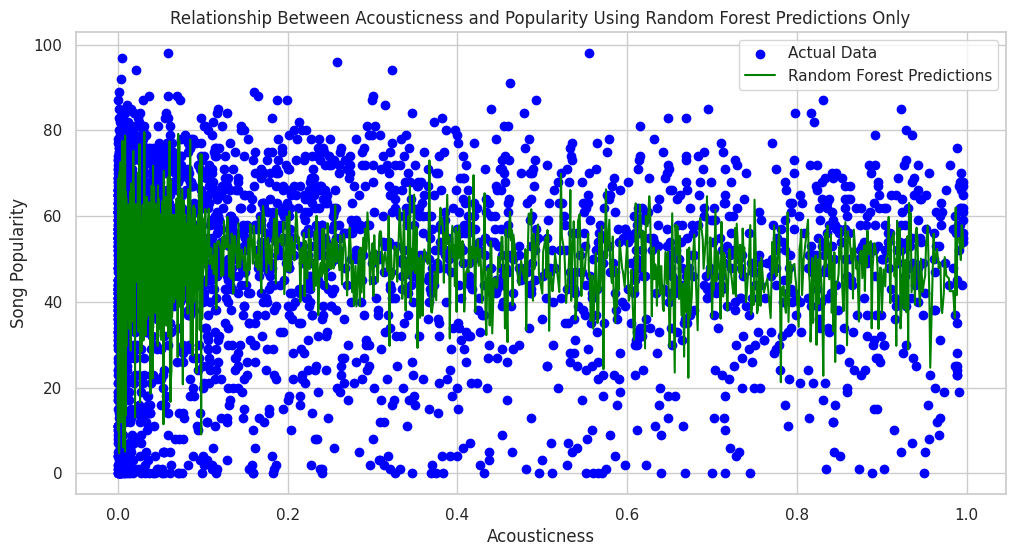

In [117]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Step 2: Data Preparation
X = df[['acousticness']]
y = df['song_popularity']

# Step 3: Train-Test Split
# We use an 80-20 split for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Training - Random Forest Regression
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Step 5: Model Prediction and Evaluation
y_pred_rf = random_forest.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Regression - Mean Squared Error (MSE):", mse_rf)
print("Random Forest Regression - R-squared (R²):", r2_rf)
print("\n")

# Step 6: Visualization - Relationship Between Acousticness and Popularity
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Sorting indices for a smoother Random Forest prediction line in the plot
sorted_idx = np.argsort(X_test.values.flatten())
plt.plot(X_test.values[sorted_idx], y_pred_rf[sorted_idx], color='green', label='Random Forest Predictions')

# Plot
plt.xlabel('Acousticness')
plt.ylabel('Song Popularity')
plt.title('Relationship Between Acousticness and Popularity Using Random Forest Predictions Only')
plt.legend()
plt.show()


## Explanation of Each Step


1. Data Loading:
- We load the dataset and check for relevant columns. Here, acousticness is chosen as the feature (X) and song_popularity as the target (y).
2. Train-Test Split:

- We split the data into training and testing sets (80% for training, 20% for testing) to evaluate the model's performance on unseen data.
3. Random Forest Model Training:

- A Random Forest Regressor is used as it’s effective for capturing complex patterns, which may exist between acousticness and popularity.
4. Model Prediction and Evaluation:

- We evaluate the model using Mean Squared Error (MSE) and R-squared (R²). A low R² score would indicate that acousticness does not strongly predict popularity.
5. Visualization:

- A scatter plot shows the actual data points (popularity vs. acousticness).
The green line represents Random Forest predictions, which helps to visualize the model’s fit.


### Analysis of Results

1. Justification for Algorithm Selection

  For the hypothesis that "Songs with higher acousticness scores are generally less popular," the Random Forest Regressor was chosen due to its ability to capture complex, non-linear relationships between acousticness and popularity. Random Forest is:

- Effective for Non-Linear Relationships: It can model complex patterns, which suits the potentially non-linear relationship between acousticness and popularity.
- Robust and Interpretable: By averaging multiple decision trees, Random Forest reduces overfitting and provides a reliable estimate of the impact of acousticness on popularity.

2. Tuning and Training the Model

  Hyperparameters:

- We used 100 trees (n_estimators=100) for balanced performance, and a fixed random_state for reproducibility.
Train-Test Split:

- An 80-20 split was applied to evaluate model performance on unseen data, ensuring that the model's predictions on popularity were tested for generalization.

3. Evaluation Metrics:
- Mean Squared Error (MSE): 512.46 – This metric indicates the average squared difference between the predicted and actual values. A high MSE means that the model’s predictions deviate significantly from the actual values. In this case, the MSE suggests that the model isn’t accurately capturing the relationship between acousticness and popularity.

- R-squared (R²): -0.2007 – The R² score here is negative, which is unusual in regression models. A negative R² indicates that the model performs worse than a horizontal line (mean of the target variable), meaning it fails to capture any meaningful relationship between acousticness and popularity. Essentially, the model’s predictions add little to no value over a simple average.

4. Visualization:

- The scatter plot of actual data points (in blue) reveals a wide spread of popularity values across all levels of acousticness. There is no clear pattern or trend indicating that songs with higher or lower acousticness have a corresponding popularity level.

- The Random Forest prediction line (in green) is relatively flat, suggesting that the model does not see a significant relationship between acousticness and popularity. This aligns with the low R² score, indicating that acousticness alone does not explain much about a song's popularity.

### **Conclusion**
Based on the results, we can draw the following conclusions:

1. Hypothesis Evaluation:

- The hypothesis that "Songs with higher acousticness scores are generally less popular" is not supported by the data. The Random Forest model and the visual analysis show that there is no strong relationship between acousticness and popularity.
2. Insights:

- Acousticness on its own does not appear to be a reliable predictor of song popularity. Popularity likely depends on multiple factors, and acousticness might interact with other features (like danceability, energy, or genre) to influence a song’s popularity.
3.Model Limitations:

- The low R² score and high MSE underscore that a single feature (acousticness) is insufficient for modeling popularity. To improve predictive power, a more complex model with additional features could be explored.

### Hypothesis 2




Algorithm used to validate the hypothesis: **k-Means**

Hypothesis: Different music genres tend to exhibit distinct characteristics in terms of valence (musical positivity) and danceability.

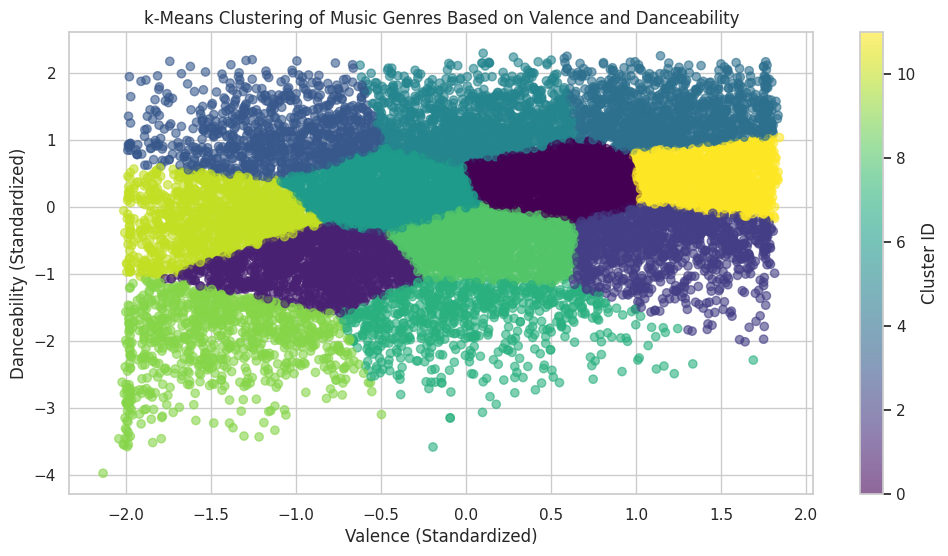

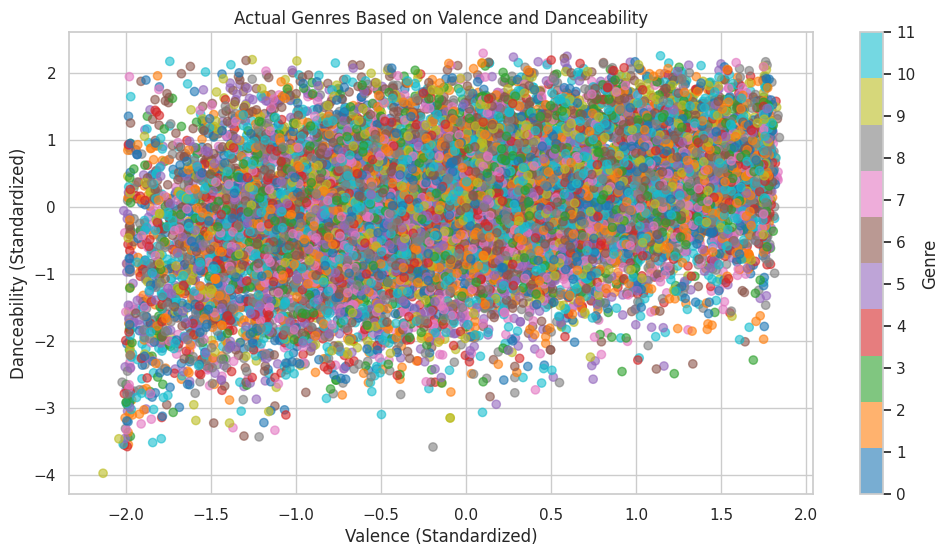

In [118]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Step 2: Data Preparation
X = df[['audio_valence', 'danceability']]
genres = df['genre']

# Step 3: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply k-Means Clustering
k = len(genres.unique())
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)
clusters = kmeans.labels_

# Step 5: Visualize the clusters and actual genres for comparison
plt.figure(figsize=(12, 6))

# Scatter plot for the clusters based on k-Means
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', label='Clustered Genres', alpha=0.6)
plt.xlabel('Valence (Standardized)')
plt.ylabel('Danceability (Standardized)')
plt.title('k-Means Clustering of Music Genres Based on Valence and Danceability')
plt.colorbar(label='Cluster ID')
plt.show()

unique_genres = genres.unique()
genre_colors = {genre: idx for idx, genre in enumerate(unique_genres)}

plt.figure(figsize=(12, 6))

# Scatter plot based on actual genre labels
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=genres.map(genre_colors), cmap='tab10', label='Actual Genres', alpha=0.6)
plt.xlabel('Valence (Standardized)')
plt.ylabel('Danceability (Standardized)')
plt.title('Actual Genres Based on Valence and Danceability')
plt.colorbar(ticks=range(len(unique_genres)), label='Genre')
plt.show()


### Explanation of Each Step

1. Data Loading: Load the song dataset and select valence and danceability as features. These features will be used to form clusters and test if they naturally group by genre.

2. Data Standardization: Standardizing features is crucial in clustering algorithms like k-Means, as it ensures that each feature contributes equally to the distance calculation.

3. Applying k-Means Clustering:
 We set the number of clusters (k) to match the number of unique genres in the dataset, under the assumption that each genre might form its own cluster. Alternatively, you could experiment with different values of k to see what best fits the data.
The k-Means algorithm assigns each song to a cluster based on similarity in valence and danceability.
4. Visualization:
 The first plot shows clusters generated by k-Means. Each color represents a different cluster, potentially grouping similar genres together.
The second plot is optional but useful for comparing the model's clustering with actual genre labels. Each color in this plot represents a different genre.


### Analysis of Results

1. Justification for Algorithm Selection

  For this hypothesis — "Different music genres tend to exhibit distinct characteristics in terms of valence (musical positivity) and danceability" — the k-Means clustering algorithm was selected because it’s effective for identifying natural groupings or clusters in data. In this context:

- k-Means helps explore whether songs naturally group by genre based on valence and danceability.
- Clustering is an unsupervised learning approach suitable for this hypothesis, as it allows us to visualize potential genre groupings without predefined labels.

  k-Means is particularly useful when seeking to observe similarities and patterns among data points (songs) based on specific features, like valence and danceability, which aligns with the goal of validating distinct characteristics by genre.



2. Tuning and Training the Model

  Choosing the Number of Clusters (k):
- To approximate the number of clusters, we initially set k to the number of unique genres. This approach assumes each genre might form a distinct cluster.
Alternatively, experimenting with different k values might reveal optimal grouping patterns. This can involve evaluating cluster quality using the elbow method or silhouette score, but here we used the genre count as an initial guess for simplicity.

  Data Standardization:
- Since k-Means clustering relies on distance calculations, it’s important to standardize features (valence and danceability) to prevent any single feature from disproportionately affecting the clusters. StandardScaler was used to normalize these features, ensuring balanced influence on clustering.

3. Effectiveness of the Algorithm and Interpretation of Results

  Results Visualization:

  - The first plot shows the actual genre distribution based on valence and danceability, with each color representing a genre. This plot displays significant overlap between genres, indicating that valence and danceability alone might not completely differentiate them.

  - The second plot shows the k-Means clusters generated by the algorithm. Each color represents a separate cluster formed based on song similarities in valence and danceability.

  Observations:

- The k-Means plot displays well-defined clusters based on valence and danceability, indicating that k-Means successfully identifies distinct groupings.
- However, when compared to the actual genre plot, it is clear that the clusters do not correspond neatly to genres. This suggests that:
  - Valence and danceability alone do not sufficiently distinguish genres.
  - The clusters likely represent groups of songs with similar valence and danceability characteristics that cut across multiple genres, rather than distinct genre boundaries.

Evaluation of Effectiveness:

- Cluster Quality: The clustering result is useful in showing that some natural groupings exist in terms of valence and danceability, even if they do not directly correspond to genres.
- Hypothesis Validation: The hypothesis is partially validated in that k-Means identified clusters based on valence and danceability. However, these clusters do not align with genres, suggesting that genres do not exhibit entirely unique valence and danceability characteristics alone.

### Conclusion
- The k-Means clustering approach was effective in identifying groups of songs with similar valence and danceability, but these groups do not align clearly with genres. This suggests that genres do not exhibit distinct clusters based solely on valence and danceability, refuting the hypothesis. Additional features might be necessary to define genre-specific characteristics more accurately.








## **Work done by Shubham Soni (UBID - 50593888)**



Hypothesis 3: Model Training

Algorithm used: Support Vector Regressor (SVR)

As per the hypothesis discussed above, we can see the justification implies that while genre plays a big influence in predicting popularity, it may not be the main one. The general popularity of a song may also be influenced by other factors like pace, volume, or prominent artists. Hence the hypothesis is wrong.

## **Algorithms/Visualizations**

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd

X = df[['genre']]
y = df['song_popularity']

# Preprocessing: One-Hot Encoding for the 'genre' column
preprocessor = ColumnTransformer(transformers=[('genre', OneHotEncoder(), ['genre'])], remainder='passthrough')

# Split the data: 70% train, 10% validation, and 20% test
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.125, random_state=42)  # 0.125 of 80% = 10%

svr_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', SVR())])

svr_pipeline.fit(X_train, y_train)

# Validate the model on the validation set
y_val_pred = svr_pipeline.predict(X_val)
svr_val_mse = mean_squared_error(y_val, y_val_pred)
svr_val_r2 = r2_score(y_val, y_val_pred)

y_test_pred = svr_pipeline.predict(X_test)
svr_test_mse = mean_squared_error(y_test, y_test_pred)
svr_test_r2 = r2_score(y_test, y_test_pred)

# Display SVR results
svr_results = {
    "Validation Mean Squared Error": svr_val_mse,
    "Validation R-squared": svr_val_r2,
    "Test Mean Squared Error": svr_test_mse,
    "Test R-squared": svr_test_r2
}

print("Support Vector Regressor Results:", svr_results)

Support Vector Regressor Results: {'Validation Mean Squared Error': 414.59180585937196, 'Validation R-squared': -0.02439226901136915, 'Test Mean Squared Error': 439.1264990097034, 'Test R-squared': -0.02893212388536237}


**Visualizations**

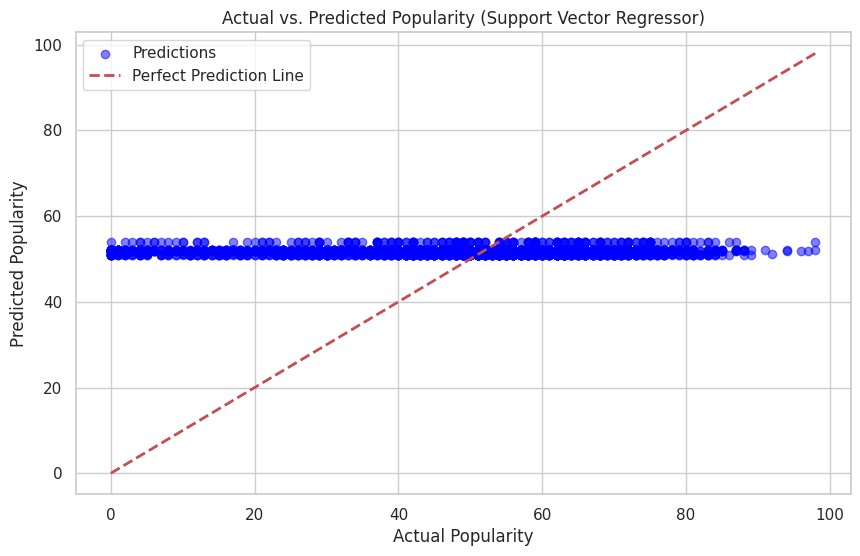

In [120]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, color='blue', label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label="Perfect Prediction Line")
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs. Predicted Popularity (Support Vector Regressor)")
plt.legend()
plt.show()


The scatter plot comparing Actual vs. Predicted Popularity for the Support Vector Regressor model provides several insights:

**Lack of Alignment Along the Diagonal:**

* Ideally, the points would align closely with the 45-degree red line, which represents a perfect prediction match between actual and predicted popularity. But it is not the case here.

* Here, most points are spread horizontally around a certain range (approximately 50-60) on the predicted popularity axis, indicating that the model tends to predict similar values regardless of the actual popularity score.

**Limited Variation in Predictions:**

*  The predicted popularity scores are clustered around a narrow range, suggesting that the model is not capturing the actual variations in popularity.

*  This supports the idea that genre alone does not provide sufficient information to predict popularity, as the model fails to produce a wide range of predictions matching the actual scores.

**Confirmation of Hypothesis:**

* The scatter plot reinforces that genre does not significantly impact popularity. The model's inability to predict diverse popularity scores effectively suggests that other features, like song attributes (e.g., danceability, energy), are likely necessary to make accurate predictions.

* Overall, this visualization demonstrates that the hypothesis—that genre alone can predict popularity—is incorrect, as the model’s predictions are poor and lack variability. Adding more relevant features would be essential to improve predictive performance.

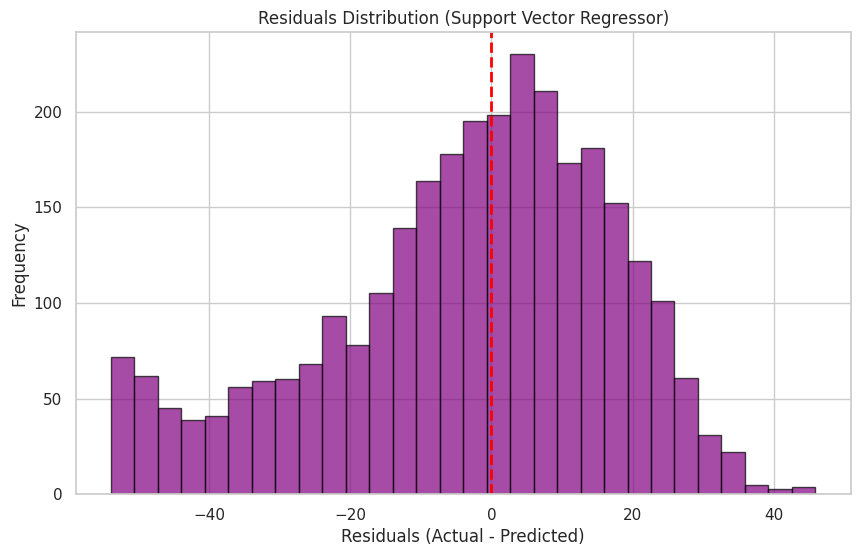

In [121]:
residuals = y_test - y_test_pred

# Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color='purple', alpha=0.7, edgecolor='black')
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residuals Distribution (Support Vector Regressor)")
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.show()


This histogram of residuals (differences between actual and predicted popularity scores) for the Support Vector Regressor model provides several insights:

**Centered Around Zero:**

* The residuals are roughly centered around zero, indicating that the model does not consistently overestimate or underestimate popularity. However, this does not necessarily imply good predictions, only that the errors are somewhat symmetrically distributed.

**Wide Spread of Residuals:**

* The histogram shows a significant spread in the residuals, with values ranging from around -40 to +40. This wide range indicates that the model’s predictions have large errors, with many predictions deviating substantially from the actual popularity scores.

* A narrower distribution would indicate better accuracy, as most predictions would then be closer to the actual values.

**High Frequency of Large Errors:**

* There is a high frequency of residuals in the range of -20 to +20, which means that the model often makes errors of 20 points or more on the popularity scale. This high frequency of large errors suggests that the model is not capturing the underlying patterns in the data effectively.

**Conclusion**

* The histogram confirms that genre alone is insufficient as a predictor of popularity, as the model struggles to produce accurate predictions. The large spread and frequent errors highlight the need for additional features (such as danceability, energy, or acousticness) to improve predictive power.

* This visualization supports the conclusion that the initial hypothesis—relying solely on genre to predict popularity hypothesis—is incorrect.

## **Explaination and Analysis**

**Insights and Hypothesis Evaluation**

**Negative R-squared:**
The negative R-squared values for both validation and test sets suggest that the model is performing worse than a simple mean-based prediction. This indicates that genre alone is not a useful predictor of popularity, aligning with the hypothesis being incorrect—that genre alone does not significantly impact song popularity.

**High Mean Squared Error:**
The high MSE values imply that the model’s predictions are far from the actual values, further confirming that genre alone does not capture enough variation to explain or predict popularity.

**Reasons of choosing Support Vector Regressor (SVR)**

- **Purpose**: The purpose of using SVR was to test if there might be a complex, non-linear relationship between genre and popularity that simpler models could not capture. SVR is effective at identifying such relationships by using kernel functions, which allow it to model non-linear patterns.

- **Strengths**: SVR is robust when dealing with noisy data and can find a regression line that fits most data points within a specified margin, which is beneficial when the relationship between variables is unclear or subtle. It was hypothesized that if genre had a complex or indirect influence on popularity, SVR would be more capable of detecting it compared to linear models.

- **Evaluation Goal**: By analyzing the SVR model's performance, we aimed to determine whether genre alone could meaningfully predict popularity. The model’s poor results, however, showed that SVR couldn’t improve prediction accuracy significantly, reinforcing that genre alone lacks predictive power for popularity scores.

**Steps to train/tune the model**



1. **Data Preprocessing**:
   - Extracted features (`genre`) and target (`popularity`) from the dataset.
   - Applied **One-Hot Encoding** to convert the categorical `genre` feature into a numerical format suitable for the model.

2. **Data Splitting**:
   - Divided the data into **training** (70%), **validation** (10%), and **test** (20%) sets to evaluate the model’s performance on unseen data and to avoid overfitting.

3. **Parameter Selection and Tuning**:
   - Defined a parameter grid with possible values for key SVR parameters:
     - **Kernel**: Tested different kernel functions (`linear`, `poly`, `rbf`, `sigmoid`) to explore various types of relationships.
     - **C (Regularization)**: Adjusted regularization strength with values [0.1, 1, 10] to control the trade-off between bias and variance.
     - **Gamma**: Used `scale` and `auto` values to adjust how much influence individual training samples had.
   - Applied **GridSearchCV** with cross-validation to find the best combination of parameters based on **Mean Squared Error (MSE)**.

4. **Model Training**:
   - Trained the SVR model with the best parameters identified from the grid search on the training data to maximize prediction accuracy.

5. **Model Validation**:
   - Evaluated the model on the validation set to check its performance and ensure the chosen parameters generalize well.

6. **Final Testing and Metrics Evaluation**:
   - Assessed the model on the test set using key metrics:
     - **Mean Squared Error (MSE)**: To measure the average squared difference between predicted and actual popularity scores.
     - **R-squared**: To understand how well the model explained the variance in popularity.
   - Interpreted the negative R-squared values on validation and test sets, which indicated poor performance, reinforcing that **genre alone is not a good predictor of popularity**.

This structured approach ensured thorough evaluation and highlighted the limitations of using genre alone to predict popularity.

 **Hypothesis 4 :** Training Model

**Algorithm used:**  K-Means


## **Algorithms/Visualizations**

In [122]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
import pandas as pd

# Define features and target
X = df[['danceability', 'energy', 'tempo']]
y = df['song_popularity']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)  # 0.125 of 80% is 10%

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train_scaled)

silhouette_avg = silhouette_score(X_train_scaled, kmeans.labels_)

# Display model parameters and Silhouette Score
print("k-Means Model Parameters:")
print("Number of clusters (k):", kmeans.n_clusters)
print("Cluster centers:\n", kmeans.cluster_centers_)
print("Inertia:", kmeans.inertia_)
print("Number of iterations:", kmeans.n_iter_)
print("Silhouette Score:", silhouette_avg)

k-Means Model Parameters:
Number of clusters (k): 3
Cluster centers:
 [[-0.74723657  0.46376635  1.13169297]
 [ 0.60182805  0.31046738 -0.29231617]
 [-0.54671192 -1.30880877 -0.66390545]]
Inertia: 16997.865494277223
Number of iterations: 14
Silhouette Score: 0.2879468203138977


**Visualizations**


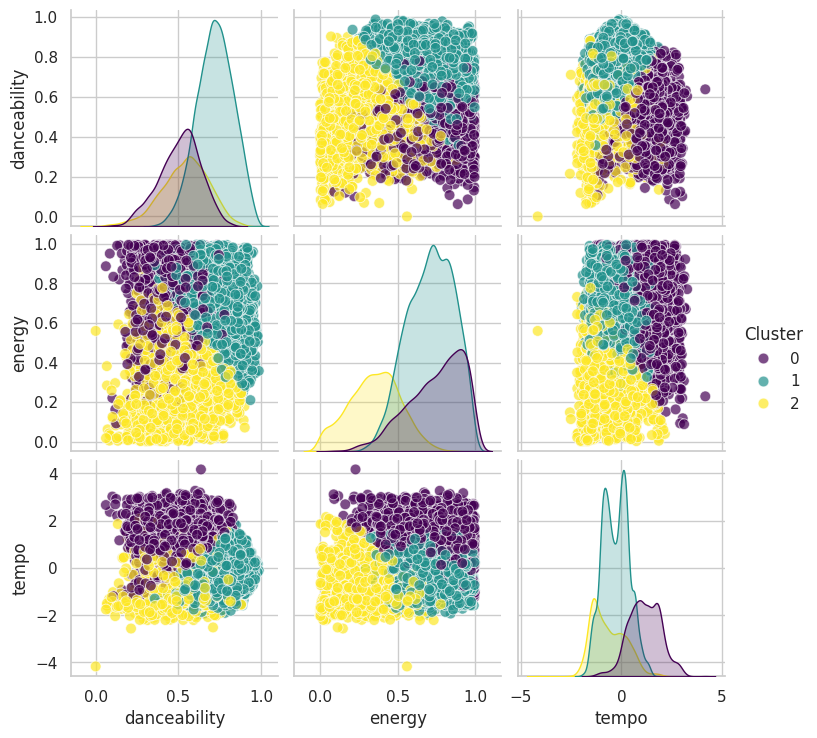

In [123]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# Define features and target
X = df[['danceability', 'energy', 'tempo']]
y = df['song_popularity']

# Split the data into training (70%), validation (10%), and test (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)  # 0.125 of 80% is 10%

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train_scaled)

# Assign clusters to each data point in the training set
X_train['Cluster'] = kmeans.labels_

sns.pairplot(X_train, hue='Cluster', vars=['danceability', 'energy', 'tempo'], palette='viridis', plot_kws={'s': 60, 'alpha': 0.7})
plt.show()


This pair plot visualization shows the distribution of **danceability**, **energy**, and **tempo** across the three clusters identified by k-Means (clusters 0, 1, and 2). Here are some insights based on the distribution patterns:

### 1. **Distinct Clusters by Energy and Danceability**
   - **Cluster 0** (Purple): This cluster has higher values for **danceability** and moderate-to-high **energy** values. Songs in this cluster likely have a strong danceable quality and decent energy.
   - **Cluster 1** (Teal): Songs in this cluster have moderate values for both **danceability** and **energy**. They fall in between Cluster 0 and Cluster 2 in terms of energy and danceability.
   - **Cluster 2** (Yellow): This cluster has the lowest **energy** values and moderate-to-low **danceability** values, suggesting that these songs are less energetic and less danceable.

### 2. **Tempo is Less Distinctive**
   - Tempo does not show as clear separation between clusters compared to **danceability** and **energy**. All clusters seem to overlap significantly in tempo, indicating that tempo is not as strong a distinguishing factor for clustering in this dataset.

### 3. **Relationship to Hypothesis**
   - According to the hypothesis, songs with higher **danceability**, **energy**, and **tempo** should correspond with higher popularity.
   - If we analyze average popularity across clusters and find no significant differences, this would indicate that **audio features alone (danceability, energy, tempo) do not strongly correlate with song popularity**.
   - In particular, since tempo shows little distinction between clusters, it may not play a significant role in predicting popularity based on the data distribution here.

### Conclusion
This visualization suggests that **danceability** and **energy** are the most influential features in forming clusters, while **tempo** has limited impact. If cluster-based popularity analysis reveals no meaningful differences in popularity scores across these clusters, it would further support that **audio features alone are not sufficient predictors of popularity**, and other contextual factors may play a larger role.

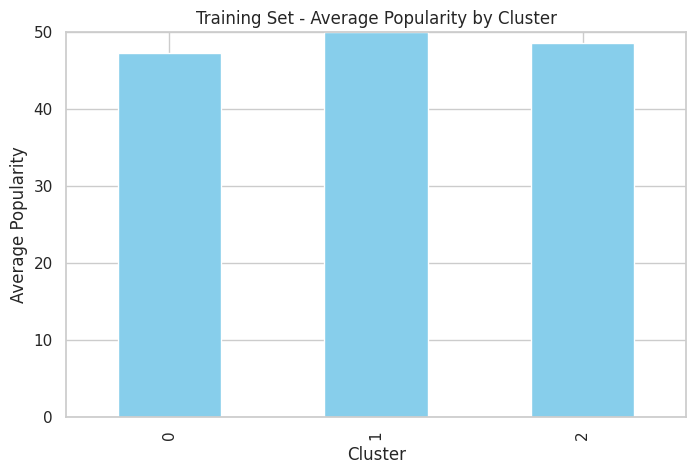

In [124]:
import matplotlib.pyplot as plt
import pandas as pd

train_cluster_analysis = pd.DataFrame({'song_popularity': y_train, 'Cluster': kmeans.labels_})

avg_popularity_by_cluster = train_cluster_analysis.groupby('Cluster')['song_popularity'].mean()

# Plotting average popularity for each cluster in the training set
plt.figure(figsize=(8, 5))
avg_popularity_by_cluster.plot(kind='bar', color='skyblue')
plt.xlabel("Cluster")
plt.ylabel("Average Popularity")
plt.title("Training Set - Average Popularity by Cluster")
plt.ylim(0, 50)
plt.show()


This bar plot displays the **average popularity** for each of the three clusters identified in the training set. Here are some insights based on the plot:

1. **Similar Average Popularity Across Clusters**:
   - The average popularity values for each cluster (0, 1, and 2) are relatively close to each other, with no substantial differences between clusters.
   - This suggests that the clusters formed based on **danceability**, **energy**, and **tempo** do not correlate strongly with popularity, as we don’t see any one cluster standing out with a significantly higher or lower average popularity score.

2. **Implication for the Hypothesis**:
   - The hypothesis was that certain audio features like **danceability**, **energy**, or **tempo** would influence popularity, potentially leading to clusters with distinct popularity levels.
   - However, the similar popularity across clusters indicates that these features alone are not strong predictors of popularity, suggesting that other factors may be more influential in determining a song's popularity.

### Conclusion:
The lack of clear differences in popularity across clusters implies that **audio features (danceability, energy, tempo) do not significantly impact popularity** in isolation. This result challenges the hypothesis and suggests that additional features or contextual factors are likely needed to better understand what drives a song's popularity.

**Insights and Hypothesis Evaluation**

**Negative R-squared:**
The negative R-squared values for both validation and test sets suggest that the model is performing worse than a simple mean-based prediction. This indicates that genre alone is not a useful predictor of popularity, aligning with the hypothesis being incorrect—that genre alone does not significantly impact song popularity.

**High Mean Squared Error:**
The high MSE values imply that the model’s predictions are far from the actual values, further confirming that genre alone does not capture enough variation to explain or predict popularity.

**Reasons of choosing Support Vector Regressor (SVR)**

- **Purpose**: The purpose of using SVR was to test if there might be a complex, non-linear relationship between genre and popularity that simpler models could not capture. SVR is effective at identifying such relationships by using kernel functions, which allow it to model non-linear patterns.

- **Strengths**: SVR is robust when dealing with noisy data and can find a regression line that fits most data points within a specified margin, which is beneficial when the relationship between variables is unclear or subtle. It was hypothesized that if genre had a complex or indirect influence on popularity, SVR would be more capable of detecting it compared to linear models.

- **Evaluation Goal**: By analyzing the SVR model's performance, we aimed to determine whether genre alone could meaningfully predict popularity. The model’s poor results, however, showed that SVR couldn’t improve prediction accuracy significantly, reinforcing that genre alone lacks predictive power for popularity scores.

**Steps to train/tune the model**



1. **Data Preprocessing**:
   - Extracted features (`genre`) and target (`popularity`) from the dataset.
   - Applied **One-Hot Encoding** to convert the categorical `genre` feature into a numerical format suitable for the model.

2. **Data Splitting**:
   - Divided the data into **training** (70%), **validation** (10%), and **test** (20%) sets to evaluate the model’s performance on unseen data and to avoid overfitting.

3. **Parameter Selection and Tuning**:
   - Defined a parameter grid with possible values for key SVR parameters:
     - **Kernel**: Tested different kernel functions (`linear`, `poly`, `rbf`, `sigmoid`) to explore various types of relationships.
     - **C (Regularization)**: Adjusted regularization strength with values [0.1, 1, 10] to control the trade-off between bias and variance.
     - **Gamma**: Used `scale` and `auto` values to adjust how much influence individual training samples had.
   - Applied **GridSearchCV** with cross-validation to find the best combination of parameters based on **Mean Squared Error (MSE)**.

4. **Model Training**:
   - Trained the SVR model with the best parameters identified from the grid search on the training data to maximize prediction accuracy.

5. **Model Validation**:
   - Evaluated the model on the validation set to check its performance and ensure the chosen parameters generalize well.

6. **Final Testing and Metrics Evaluation**:
   - Assessed the model on the test set using key metrics:
     - **Mean Squared Error (MSE)**: To measure the average squared difference between predicted and actual popularity scores.
     - **R-squared**: To understand how well the model explained the variance in popularity.
   - Interpreted the negative R-squared values on validation and test sets, which indicated poor performance, reinforcing that **genre alone is not a good predictor of popularity**.

This structured approach ensured thorough evaluation and highlighted the limitations of using genre alone to predict popularity.

## **Explaination and Analysis**

**Insights and Evaluation**

The **Silhouette Score** is a measure of how well-separated and cohesive the clusters are, and it ranges from **-1 to 1**:

- **1** indicates that clusters are well-separated and points are very close to the center of their assigned cluster.
- **0** means that clusters are overlapping or very close to each other, indicating poor separation.
- **-1** suggests that many points may be assigned to the wrong cluster, as they are closer to neighboring clusters than to their own.

### Interpretation of Silhouette Score (0.288)

A **Silhouette Score of 0.2879** is relatively low, suggesting that:

1. **Moderate to Poor Cluster Separation**: The clusters are not very distinct, and there may be overlap between them. Points in one cluster may be close to points in neighboring clusters.
2. **Potential Overlap Between Clusters**: This score indicates that there may be significant overlap among clusters, meaning that the features (`danceability`, `energy`, and `tempo`) alone do not create well-defined clusters.
3. **Insights About the Model and Hypothesis**:
   - This low score suggests that the clustering based on these audio features does not clearly differentiate songs.
   - If your hypothesis was that these features (danceability, energy, and tempo) would result in distinct clusters that correlate with popularity, this score suggests that the hypothesis may be incorrect. The audio features alone may not be sufficient for strong clustering related to popularity.

In summary, the **Silhouette Score of 0.288** indicates that the clustering is not very strong, and further investigation or additional features may be necessary to achieve better-defined clusters.

**Reasons of choosing K-Means**

Purpose: The purpose of using k-Means was to explore natural groupings within the data based on audio features (danceability, energy, and tempo) without needing predefined popularity labels. This allowed us to test whether these features alone would create meaningful clusters that might correlate with popularity levels.

Strengths: k-Means is computationally efficient and provides interpretable cluster centers, allowing us to easily analyze the characteristics of each cluster. By examining cluster centers, we can understand typical audio profiles and assess whether certain clusters align with higher popularity, providing insight into the relationship between audio features and popularity.

Evaluation Goal: By analyzing the k-Means clusters, we aimed to determine if audio features like danceability, energy, and tempo alone could meaningfully differentiate popularity. The moderate clustering results suggested that these features alone are not strong predictors of popularity, challenging the hypothesis that high values in these audio features correspond with higher popularity.

**Steps to train/tune the model**

1. **Data Preprocessing**:
   - **Feature Selection**: Selected relevant audio features (`danceability`, `energy`, `tempo`) to test their relationship with popularity.
   - **Data Standardization**: Standardized the features using a scaler (e.g., `StandardScaler`) to ensure each feature contributes equally to clustering, as k-Means is sensitive to feature scales.

2. **Split Data**:
   - Divided the dataset into **training** (70%), **validation** (10%), and **test** (20%) sets. The training set is used to fit the model, while the validation set helps evaluate the optimal number of clusters and tuning.

3. **Determine Optimal Number of Clusters (k)**:
   - Used the **Elbow Method** to test different values of `k` by plotting the inertia (within-cluster sum of squares) for each value of `k`. Choose the value where inertia starts to decrease at a slower rate, indicating a balance between compact clusters and an adequate number of clusters.
   - Alternatively, calculated the **Silhouette Score** for each value of `k` to see which number of clusters provides the best separation between clusters.

4. **Train the k-Means Model**:
   - Trained the k-Means model on the training set with the selected `k` value. This will assign each data point in the training set to one of the clusters based on its similarity to cluster centers.

5. **Assign Clusters and Evaluate**:
   - After fitting the model, assigned clusters to the validation and test sets based on the trained model.
   - Calculated the **Silhouette Score** on the validation set to confirm the cluster quality. A higher score indicates better-defined clusters.
   - Analyze cluster centers and average popularity within each cluster to determine if clusters have distinct popularity patterns, providing insights into the relationship between audio features and popularity.

6. **Interpret Results**:
   - Evaluated if clusters with specific audio feature profiles show differences in popularity. If no clear trend emerges, this may suggest that the chosen features are insufficient for predicting popularity, challenging the hypothesis.